In [ ]:
import pandas as pd
import os

train = pd.read_csv("/content/drive/MyDrive/hajarRA/adult_train.csv")
test = pd.read_csv("/content/drive/MyDrive/hajarRA/adult_test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Train columns:", train.columns.tolist())

df = pd.concat([train, test], ignore_index=True)

output_dir = "/content/drive/MyDrive/hajarRA"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "adult_full.csv")
df.to_csv(output_path, index=False)

print(f"Combined dataset saved successfully at: {output_path}")
print("Shape of combined dataset:", df.shape)
print(df.head())


Train shape: (32561, 15)
Test shape: (16282, 15)
Train columns: ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target']
Combined dataset saved successfully at: /content/drive/MyDrive/hajarRA/adult_full.csv
Shape of combined dataset: (48843, 15)
  Age          Workclass    fnlwgt   Education  Education_Num  \
0  39          State-gov   77516.0   Bachelors           13.0   
1  50   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38            Private  215646.0     HS-grad            9.0   
3  53            Private  234721.0        11th            7.0   
4  28            Private  338409.0   Bachelors           13.0   

        Martial_Status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White 

In [ ]:
import pandas as pd
import numpy as np
import os

# Paths
src_path = "/content/drive/MyDrive/hajarRA/adult_full.csv"
save_dir = "/content/drive/MyDrive/hajarRA"
os.makedirs(save_dir, exist_ok=True)

df = pd.read_csv(src_path)

df = df.replace({'?': np.nan, ' ?': np.nan})
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()


if "Target" in df.columns:
    df["Target"] = df["Target"].str.replace(".", "", regex=False).str.strip()


df.replace({'': np.nan}, inplace=True)

before = df.shape[0]
df.dropna(inplace=True)
after = df.shape[0]


clean_path = f"{save_dir}/adult_full_clean.csv"
df.to_csv(clean_path, index=False)


print("Cleaned file saved:", clean_path)
print(f"Rows before: {before} | after cleaning: {after}")
print("Columns:", list(df.columns))


if "Target" in df.columns:
    print("\nTarget value counts (normalized):")
    print(df["Target"].value_counts(normalize=True))
print(df.head())


Cleaned file saved: /content/drive/MyDrive/hajarRA/adult_full_clean.csv
Rows before: 48843 | after cleaning: 48842
Columns: ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target']

Target value counts (normalized):
Target
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64
  Age         Workclass    fnlwgt  Education  Education_Num  \
0  39         State-gov   77516.0  Bachelors           13.0   
1  50  Self-emp-not-inc   83311.0  Bachelors           13.0   
2  38           Private  215646.0    HS-grad            9.0   
3  53           Private  234721.0       11th            7.0   
4  28           Private  338409.0  Bachelors           13.0   

       Martial_Status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial   

In [ ]:
#Baseline ALM

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

clean_path = "/content/drive/MyDrive/hajarRA/adult_full_clean.csv"


df = pd.read_csv(clean_path)


train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df["Target"]
)

out_dir = os.path.dirname(clean_path)
train_path = os.path.join(out_dir, "train.csv")
test_path  = os.path.join(out_dir, "test.csv")
train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print("Saved splits:")
print("Train:", train_path, train_df.shape)
print("Test :", test_path,  test_df.shape)
print("\nTarget distribution (train):")
print(train_df["Target"].value_counts(normalize=True))
print("\nTarget distribution (test):")
print(test_df["Target"].value_counts(normalize=True))


Saved splits:
Train: /content/drive/MyDrive/hajarRA/train.csv (39073, 15)
Test : /content/drive/MyDrive/hajarRA/test.csv (9769, 15)

Target distribution (train):
Target
<=50K    0.76073
>50K     0.23927
Name: proportion, dtype: float64

Target distribution (test):
Target
<=50K    0.760672
>50K     0.239328
Name: proportion, dtype: float64


In [ ]:
!pip -q install realtabformer

import pandas as pd
from pathlib import Path

from realtabformer import REaLTabFormer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.9 MB/s eta 0:00:00


In [9]:
import torch, pandas as pd
from pathlib import Path
from realtabformer import REaLTabFormer

TRAIN_CSV = Path("./train.csv")
SAVE_DIR  = Path("./RTF_resources/rtf_model")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

train_df = pd.read_csv(TRAIN_CSV)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

rtf = REaLTabFormer(
    model_type="tabular",
    epochs=50,
    batch_size=128,
    learning_rate=2e-4,

    logging_strategy="steps",
    logging_steps=50,
    report_to=[],
)

rtf.fit(train_df, device=device)

try:
    rtf.save(SAVE_DIR)
    print(f"Model saved to: {SAVE_DIR}")
except Exception as e:
    print("Save not supported in this version:", e)

Using device: cuda
Computing the sensitivity threshold...
Using parallel computation!!!


Bootstrap round: 100%|██████████| 500/500 [03:17<00:00,  2.53it/s]


Sensitivity threshold summary:
count    500.000000
mean      -0.000141
std        0.001529
min       -0.003785
25%       -0.001188
50%       -0.000220
75%        0.000847
max        0.005153
dtype: float64
Sensitivity threshold: 0.002597695600725804 qt_max: 0.05


Map: 100%|██████████| 39073/39073 [00:08<00:00, 4766.21 examples/s]
`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
50,1.301000
100,0.887500
150,0.875400
200,0.867700
250,0.861500
300,0.858900
350,0.854700


19456it [00:44, 435.26it/s]                           


Generated 0 invalid samples out of total 19456 samples generated. Sampling efficiency is: 100.0000%


19456it [00:44, 436.40it/s]                           


Generated 0 invalid samples out of total 19456 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 10,                     sensitivity_threshold: 0.002597695600725804,                         val_sensitivity: 0.0024267928235354947,                             val_sensitivities: [np.float64(0.004214828602450752), np.float64(0.0010490150457577168), np.float64(0.0025290832945556074), np.float64(0.002313789359391965), np.float64(0.000720490150457577), np.float64(0.0012686520862416628), np.float64(0.002175740654568016), np.float64(0.0025638281371180393), np.float64(0.0029761129207383275), np.float64(0.003511865984178688), np.float64(0.0030210950829843335), np.float64(0.002944470296261827), np.float64(0.001790445168295331), np.float64(0.003879478827361564), np.float64(0.0014429967426710093)]


Step,Training Loss
800,0.842400
850,0.843500
900,0.840400
950,0.840200
1000,0.839300
1050,0.836100
1100,0.834100
1150,0.833300


19456it [00:44, 434.31it/s]                           


Generated 0 invalid samples out of total 19456 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 15,                     sensitivity_threshold: 0.002597695600725804,                         val_sensitivity: 0.0017878806680109612,                             val_sensitivities: [np.float64(0.004326818675352878), np.float64(0.0011557313479137587), np.float64(0.002177291763610982), np.float64(0.0023153404684349305), np.float64(0.0009202729951915623), np.float64(-1.6286644951140074e-05), np.float64(0.0008020784861175739), np.float64(0.00054614549402823), np.float64(0.002233752132774934), np.float64(0.0019868155731347916), np.float64(0.0021199007290212506), np.float64(0.0019982937800527376), np.float64(0.0015258259655653794), np.float64(0.0036393671475104705), np.float64(0.0010868621064060802)]


Step,Training Loss
1200,0.829700
1250,0.827600
1300,0.826000
1350,0.819700
1400,0.819400
1450,0.814700
1500,0.807900


19456it [00:44, 433.07it/s]                           


Generated 0 invalid samples out of total 19456 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 20,                     sensitivity_threshold: 0.002597695600725804,                         val_sensitivity: 0.002271764645054547,                             val_sensitivities: [np.float64(0.004583682332868001), np.float64(0.002073987901349465), np.float64(0.0026665115557623705), np.float64(0.002436326973786257), np.float64(0.0009658756010547544), np.float64(0.0014243834341554206), np.float64(0.0018332557778811848), np.float64(-0.00027066852799751843), np.float64(0.002168605552970374), np.float64(0.0026060183030867067), np.float64(0.0029497440670079107), np.float64(0.002152784240732124), np.float64(0.002429191872188615), np.float64(0.004000155110904297), np.float64(0.0020566154800682485)]


Step,Training Loss
1550,0.795900
1600,0.799000
1650,0.791700
1700,0.790500
1750,0.778800
1800,0.773900
1850,0.771700
1900,0.755800


19456it [00:45, 431.46it/s]                           


Generated 0 invalid samples out of total 19456 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 25,                     sensitivity_threshold: 0.002597695600725804,                         val_sensitivity: 0.0022044671940437415,                             val_sensitivities: [np.float64(0.0050524274856522415), np.float64(0.00098914223669924), np.float64(0.004019699084845665), np.float64(0.0028576081898557463), np.float64(0.0020541337055995034), np.float64(0.0012218085931440979), np.float64(0.0008600899643244919), np.float64(0.000715526601520087), np.float64(0.0013812626027609736), np.float64(0.002396308360477741), np.float64(0.002939506747324337), np.float64(0.002344191096634093), np.float64(0.0015943849852644643), np.float64(0.0029534667287110282), np.float64(0.0016874515278424073)]


Step,Training Loss
1950,0.736200
2000,0.749100
2050,0.728900
2100,0.726100
2150,0.721200
2200,0.701200
2250,0.698500
2300,0.689000


19456it [00:45, 430.39it/s]                           


Generated 0 invalid samples out of total 19456 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 30,                     sensitivity_threshold: 0.002597695600725804,                         val_sensitivity: 0.004690688175378729,                             val_sensitivities: [np.float64(0.009325422677214206), np.float64(0.006375523499302002), np.float64(0.008116488289126728), np.float64(0.006011012874205056), np.float64(0.004558244144563363), np.float64(0.0028948348068869247), np.float64(0.003588180549092601), np.float64(0.003341554211261052), np.float64(0.004433845199317512), np.float64(0.005011788428726539), np.float64(0.0036983092911431676), np.float64(0.0029469520707305725), np.float64(0.0025635179153094467), np.float64(0.0040587870327284), np.float64(0.0034358616410733673)]


Step,Training Loss
2350,0.667300
2400,0.671300
2450,0.658100
2500,0.644300
2550,0.642100
2600,0.626400
2650,0.615900


19456it [00:45, 428.47it/s]                           


Generated 0 invalid samples out of total 19456 samples generated. Sampling efficiency is: 100.0000%
Critic round: 35,                     sensitivity_threshold: 0.002597695600725804,                         val_sensitivity: 0.012564208089059163,                             val_sensitivities: [np.float64(0.01459547076159454), np.float64(0.01165208624166279), np.float64(0.014012563983248023), np.float64(0.012251039275299372), np.float64(0.011335236086120243), np.float64(0.011305878703272841), np.float64(0.01169045107650307), np.float64(0.010167524973630326), np.float64(0.012604156972235148), np.float64(0.01327201092014643), np.float64(0.014409337676438651), np.float64(0.012002947107181633), np.float64(0.012999379556382813), np.float64(0.014057235923685437), np.float64(0.012107802078486121)]
Stopping training, no improvement in critic...
Copying artefacts from: best-disc-model
Copying artefacts from: mean-best-disc-model
Copying artefacts from: not-best-disc-model
Copying artefacts from: 

In [10]:
from pathlib import Path
import torch, pandas as pd

OUT_DIR = Path("./RTF_resources/rtf_outputs")
OUT_DIR.mkdir(parents=True, exist_ok=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Sampling on:", device)

SYNTH_ROWS = len(train_df)

try:
    synthetic_df = rtf.sample(n_samples=SYNTH_ROWS, gen_batch=128, device=device)
except TypeError:
    synthetic_df = rtf.sample(n=SYNTH_ROWS, gen_batch=128, device=device)

synthetic_path = OUT_DIR / "synthetic.csv"
synthetic_df.to_csv(synthetic_path, index=False)
print(f"Generated {len(synthetic_df)} rows → {synthetic_path}")


Sampling on: cuda


39168it [01:21, 478.46it/s]                           


Generated 0 invalid samples out of total 39168 samples generated. Sampling efficiency is: 100.0000%
Generated 39073 rows → RTF_resources/rtf_outputs/synthetic.csv


In [16]:
# FIXED CELL: ALL QUALITY (Q) METRICS with robust categorical handling

import json, math
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import normalized_mutual_info_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import ks_2samp, entropy, spearmanr

# ---------- Paths ----------
DATA_DIR = Path("./RTF_resources")
REAL_CSV = DATA_DIR / "train.csv"
SYN_CSV  = DATA_DIR / "rtf_outputs/synthetic.csv"
OUT_DIR  = DATA_DIR / "rtf_outputs"
OUT_DIR.mkdir(parents=True, exist_ok=True)

real = pd.read_csv(REAL_CSV)
synt = pd.read_csv(SYN_CSV)

# ---------- Schema ----------
target_col = "Target" if "Target" in real.columns else None
cols = [c for c in real.columns if c != target_col]
cat_cols = [c for c in cols if real[c].dtype == "object"]
num_cols = [c for c in cols if c not in cat_cols]

# === FIX 1: Skip temporal auto-detect for Adult ===
temp_cols = []

print("Columns:", cols)
print("Numeric:", num_cols)
print("Categorical:", cat_cols)
print("Temporal:", temp_cols)

# ---------- Helpers ----------
def tvd_from_counts(p, q):
    # === FIX 2a: avoid mixed-type sort by casting with key=str
    keys = sorted(set(p).union(q), key=str)
    pv = np.array([p.get(k, 0.0) for k in keys], dtype=float)
    qv = np.array([q.get(k, 0.0) for k in keys], dtype=float)
    return 0.5 * np.abs(pv - qv).sum()

def js_divergence(p, q, base=np.e):
    p = np.asarray(p, dtype=float); q = np.asarray(q, dtype=float)
    p = p / (p.sum() + 1e-12); q = q / (q.sum() + 1e-12)
    m = 0.5*(p+q)
    return 0.5*entropy(p, m, base=base) + 0.5*entropy(q, m, base=base)

def hist_compare(xr, xs, bins=30, rng=None, smooth=1e-9):
    if rng is None:
        lo = np.nanmin(np.concatenate([xr, xs])); hi = np.nanmax(np.concatenate([xr, xs]))
        if lo == hi: hi = lo + 1.0
        rng = (lo, hi)
    hr, edges = np.histogram(xr, bins=bins, range=rng)
    hs, _     = np.histogram(xs, bins=bins, range=rng)
    pr = (hr + smooth) / (hr.sum() + smooth*bins)
    ps = (hs + smooth) / (hs.sum() + smooth*bins)
    return dict(kl_rs=float(entropy(pr, ps)),
                kl_sr=float(entropy(ps, pr)),
                jsd=float(js_divergence(pr, ps)))

def safe_mean(vals):
    arr = np.array([v for v in vals if pd.notna(v)], dtype=float)
    return float(arr.mean()) if arr.size else float("nan")

def inv01(x, cap=1.0):
    if pd.isna(x): return np.nan
    return float(max(0.0, min(1.0, 1.0 - x/cap)))


NAN_TOKEN = "___NaN___"
real_cat = real[cat_cols].copy().astype(str)
synt_cat = synt[cat_cols].copy().astype(str)

for df_ in (real_cat, synt_cat):
    for c in cat_cols:
        df_[c] = df_[c].replace({"nan": NAN_TOKEN}).str.strip()

# ---------- D: Distribution similarity ----------
D = {"numeric": {}, "categorical": {}}

# Numeric
for c in num_cols:
    xr = real[c].dropna().values
    xs = synt[c].dropna().values
    if len(xr)==0 or len(xs)==0:
        D["numeric"][c] = {"ks": np.nan, "kl_rs": np.nan, "kl_sr": np.nan, "jsd": np.nan, "range_coverage": np.nan}
        continue
    ks = ks_2samp(xr, xs).statistic
    h = hist_compare(xr, xs, bins=30)
    lo, hi = np.nanmin(xr), np.nanmax(xr)
    rc = float(np.mean((xs >= lo) & (xs <= hi)))
    D["numeric"][c] = {"ks": float(ks), **h, "range_coverage": rc}

# Categorical (use standardized frames)
for c in cat_cols:
    pr = real_cat[c].value_counts(normalize=True).to_dict()
    ps = synt_cat[c].value_counts(normalize=True).to_dict()
    tvd = tvd_from_counts(pr, ps)
    D["categorical"][c] = {"tvd": float(tvd), "freq_alignment": float(1.0 - tvd)}

D_summary = dict(
    mean_numeric_ks=safe_mean([D["numeric"][c]["ks"] for c in num_cols]),
    mean_numeric_jsd=safe_mean([D["numeric"][c]["jsd"] for c in num_cols]),
    mean_numeric_range_coverage=safe_mean([D["numeric"][c]["range_coverage"] for c in num_cols]),
    mean_categorical_tvd=safe_mean([D["categorical"][c]["tvd"] for c in cat_cols]),
)
print("\n=== D (Distribution) ==="); print(D_summary)

# ---------- A: Anomalies & rare events ----------
A = {"numeric_outlier_diff": {}, "categorical_rare_diff": {}}

# Numeric IQR outliers
for c in num_cols:
    xr = real[c].dropna().values
    xs = synt[c].dropna().values
    if len(xr)==0 or len(xs)==0:
        A["numeric_outlier_diff"][c] = np.nan
        continue
    q1, q3 = np.percentile(xr, [25, 75]); iqr = q3 - q1
    lo = q1 - 1.5*iqr; hi = q3 + 1.5*iqr
    rate_r = np.mean((xr < lo) | (xr > hi))
    rate_s = np.mean((xs < lo) | (xs > hi))
    A["numeric_outlier_diff"][c] = float(abs(rate_r - rate_s))


rare_thresh = 0.01
for c in cat_cols:
    pr = real_cat[c].value_counts(normalize=True)
    ps = synt_cat[c].value_counts(normalize=True)
    rare_cats = pr[pr <= rare_thresh].index
    diffs = [abs(pr.get(cat, 0.0) - ps.get(cat, 0.0)) for cat in rare_cats]
    A["categorical_rare_diff"][c] = float(np.mean(diffs)) if diffs else 0.0

A_summary = dict(
    mean_numeric_outlier_rate_absdiff=safe_mean(list(A["numeric_outlier_diff"].values())),
    mean_categorical_rare_freq_absdiff=safe_mean(list(A["categorical_rare_diff"].values()))
)
print("\n=== A (Anomalies & rare) ==="); print(A_summary)

# ---------- C: Associations ----------
def spearman_matrix(df, cols):
    m = len(cols); R = np.ones((m, m)) * np.nan
    for i, a in enumerate(cols):
        for j, b in enumerate(cols):
            if i == j:
                R[i, j] = 1.0
            elif i < j:
                rho, _ = spearmanr(df[a], df[b], nan_policy="omit")
                R[i, j] = R[j, i] = rho
    return R

C_num = np.nan
if len(num_cols) >= 2:
    Rr = spearman_matrix(real, num_cols)
    Rs = spearman_matrix(synt, num_cols)
    mask = np.isfinite(Rr) & np.isfinite(Rs)
    C_num = float(1.0 - np.nanmean(np.abs(Rr[mask] - Rs[mask])))

def nmi_matrix(df, cols):
    m = len(cols); M = np.ones((m, m)) * np.nan
    for i, a in enumerate(cols):
        for j, b in enumerate(cols):
            if i == j:
                M[i, j] = 1.0
            elif i < j:
                M[i, j] = M[j, i] = normalized_mutual_info_score(df[a].astype(str), df[b].astype(str))
    return M


C_cat = np.nan
if len(cat_cols) >= 2:
    Mr = nmi_matrix(real_cat, cat_cols)
    Ms = nmi_matrix(synt_cat, cat_cols)
    mask = np.isfinite(Mr) & np.isfinite(Ms)
    C_cat = float(1.0 - np.nanmean(np.abs(Mr[mask] - Ms[mask])))

def discretize_series(x, bins=10):
    try:    return pd.qcut(x, q=bins, duplicates="drop").astype(str)
    except: return pd.cut(x, bins=bins, include_lowest=True).astype(str)

C_mix_vals = []
for a in num_cols:
    xr = discretize_series(real[a]); xs = discretize_series(synt[a])
    for b in cat_cols:
        nr = normalized_mutual_info_score(xr.astype(str), real_cat[b].astype(str))
        ns = normalized_mutual_info_score(xs.astype(str), synt_cat[b].astype(str))
        if pd.notna(nr) and pd.notna(ns):
            C_mix_vals.append(1.0 - abs(nr - ns))
C_mix = float(np.mean(C_mix_vals)) if C_mix_vals else np.nan

C_summary = dict(
    association_numeric_numeric=C_num,
    association_categorical_categorical=C_cat,
    association_mixed=C_mix
)
print("\n=== C (Associations) ==="); print(C_summary)

# ---------- V: Diversity / coverage ----------
V = {"category_coverage": {}, "support_coverage_proxy": {}}
alpha = 1e-4
for c in cat_cols:
    pr = real_cat[c].value_counts(normalize=True)
    ps = synt_cat[c].value_counts(normalize=True)
    cats = set(pr.index)
    cc = float(np.mean([cat in ps.index for cat in cats]))
    num = 0.0; den = 0.0
    for cat, pr_k in pr.items():
        den += pr_k
        num += min(ps.get(cat, 0.0) + alpha, pr_k)
    sc = float(num / (den + 1e-12))
    V["category_coverage"][c] = cc
    V["support_coverage_proxy"][c] = sc

V_summary = dict(
    mean_category_coverage=safe_mean(list(V["category_coverage"].values())),
    mean_support_coverage=safe_mean(list(V["support_coverage_proxy"].values()))
)
print("\n=== V (Diversity/Coverage) ==="); print(V_summary)


# ---- Add this at the very end of your QUALITY cell ----


D_score = np.nanmean([
    1.0 - (D_summary["mean_numeric_ks"]),          # KS: lower → better
    1.0 - (D_summary["mean_numeric_jsd"]),         # JSD: lower → better
    D_summary["mean_numeric_range_coverage"],      # RC: higher → better
    1.0 - (D_summary["mean_categorical_tvd"]),     # TVD: lower → better
])

A_score = np.nanmean([
    1.0 - min(1.0, A_summary["mean_numeric_outlier_rate_absdiff"]/0.10),
    1.0 - min(1.0, A_summary["mean_categorical_rare_freq_absdiff"]/0.02),
])

C_score = np.nanmean([
    C_summary["association_numeric_numeric"],
    C_summary["association_categorical_categorical"],
    C_summary["association_mixed"],
])

V_score = np.nanmean([
    V_summary["mean_category_coverage"],
    V_summary["mean_support_coverage"],
])


T_score = np.nan


WQ = {"D": 0.40, "A": 0.10, "C": 0.40, "V": 0.10, "T": 0.00}
Q_score = (
    WQ["D"] * (0 if pd.isna(D_score) else D_score) +
    WQ["A"] * (0 if pd.isna(A_score) else A_score) +
    WQ["C"] * (0 if pd.isna(C_score) else C_score) +
    WQ["V"] * (0 if pd.isna(V_score) else V_score) +
    WQ["T"] * (0 if pd.isna(T_score) else T_score)
)

print("\n=== Q aggregate ===")
print(Q_score)


Q_out = {
    "D_summary": D_summary, "A_summary": A_summary,
    "C_summary": C_summary, "V_summary": V_summary,
    "T_score": T_score, "Q_aggregate": float(Q_score)
}
import json, os
os.makedirs(OUT_DIR, exist_ok=True)
with open(OUT_DIR/"Q_metrics_full.json", "w") as f:
    json.dump(Q_out, f, indent=2)
print("Saved →", OUT_DIR/"Q_metrics_full.json")


Columns: ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country']
Numeric: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']
Categorical: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
Temporal: []

=== D (Distribution) ===
{'mean_numeric_ks': 0.020555541337155248, 'mean_numeric_jsd': 0.0015680190675739555, 'mean_numeric_range_coverage': 0.9999445482387667, 'mean_categorical_tvd': 0.034320374683285124}

=== A (Anomalies & rare) ===
{'mean_numeric_outlier_rate_absdiff': 0.003745126643291617, 'mean_categorical_rare_freq_absdiff': 0.00034132363682180675}

=== C (Associations) ===
{'association_numeric_numeric': 0.990113504057164, 'association_categorical_categorical': 0.9951895209453686, 'association_mixed': 0.9977139901133478}

=== V (Diversity/Coverage) ===
{'mean_category_

In [19]:
# FIXED CELL: ALL PRIVACY (P) METRICS (DCR, Qδ, I) + Aggregate P

import json, numpy as np, pandas as pd
from pathlib import Path
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors

# ---------- Paths ----------
DATA_DIR = Path("./RTF_resources")
REAL_CSV = DATA_DIR / "train.csv"
SYN_CSV  = DATA_DIR / "rtf_outputs/synthetic.csv"
OUT_DIR  = DATA_DIR / "rtf_outputs"
OUT_DIR.mkdir(parents=True, exist_ok=True)

real = pd.read_csv(REAL_CSV)
synt = pd.read_csv(SYN_CSV)

target_col = "Target" if "Target" in real.columns else None
cols = [c for c in real.columns if c != target_col]
cat_cols = [c for c in cols if real[c].dtype == "object"]
num_cols = [c for c in cols if c not in cat_cols]

# ---------- Helper for OHE version compatibility ----------
from sklearn.preprocessing import OneHotEncoder
def make_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

# ---------- Encode data for distance space ----------
enc = ColumnTransformer([
    ("num", "passthrough", [c for c in cols if c in num_cols]),
    ("cat", make_ohe(),    [c for c in cols if c in cat_cols]),
])

X_real = enc.fit_transform(real[cols])
X_fake = enc.transform(synt[cols])

# ---------- DCR: Distance-to-Closest-Record ----------
nn = NearestNeighbors(n_neighbors=1).fit(X_real)
dists, _ = nn.kneighbors(X_fake)
dists = dists.ravel()
DCR_mean = float(np.mean(dists))
DCR_std  = float(np.std(dists))

# ---------- Qδ: Quantile-Difference statistic ----------
quantiles = np.linspace(0.05, 0.95, 19)
qd_vals = []
for c in num_cols:
    xr = np.asarray(real[c].dropna().values)
    xs = np.asarray(synt[c].dropna().values)
    if xr.size > 0 and xs.size > 0:
        qr = np.quantile(xr, quantiles)
        qs = np.quantile(xs, quantiles)
        qd_vals.append(float(np.mean(np.abs(qr - qs))))
Q_delta = float(np.mean(qd_vals)) if qd_vals else float("nan")

# ---------- I: Duplicate analysis ----------
def norm_df(df, cols):
    out = df[cols].copy()
    for c in cols:
        if np.issubdtype(out[c].dtype, np.number):
            out[c] = out[c].round(6)
        else:
            out[c] = out[c].astype(str).str.strip()
    return out

real_norm = norm_df(real, cols)
fake_norm = norm_df(synt, cols)

dup_within_synth = float(1.0 - len(fake_norm.drop_duplicates()) / max(1, len(fake_norm)))
set_real = set(map(tuple, real_norm.to_numpy()))
set_fake = set(map(tuple, fake_norm.to_numpy()))
overlap_between = float(len(set_real & set_fake) / max(1, len(fake_norm)))

# ---------- Aggregate P ----------
def normalize01(x, lo=0.0, hi=1.0):
    if pd.isna(x): return np.nan
    if hi == lo: return 0.0
    v = (x - lo) / (hi - lo)
    return float(max(0.0, min(1.0, v)))

def inv01(x, cap=1.0):  # for “lower-is-better”
    if pd.isna(x): return np.nan
    return float(max(0.0, min(1.0, 1.0 - x / cap)))

# Normalize each component
d95 = float(np.percentile(dists, 95)) if len(dists) else 1.0
DCR_score = normalize01(DCR_mean, lo=0.0, hi=d95 if d95 > 0 else 1.0)

Qd_cap = float(np.nanmedian(qd_vals)) * 4 if qd_vals else (abs(Q_delta) + 1e-6)
Qdelta_score = inv01(Q_delta, cap=Qd_cap if Qd_cap > 0 else 1.0)

I_combined = 0.5 * (dup_within_synth + overlap_between)
I_score = inv01(I_combined, cap=0.10)

# Weights
WP = {"DCR": 0.5, "Qdelta": 0.3, "I": 0.2}
P_aggregate = (
    WP["DCR"] * (0 if pd.isna(DCR_score) else DCR_score)
    + WP["Qdelta"] * (0 if pd.isna(Qdelta_score) else Qdelta_score)
    + WP["I"] * (0 if pd.isna(I_score) else I_score)
)

# ---------- Output ----------
P_out = {
    "parts": {
        "DCR_mean": DCR_mean,
        "DCR_std": DCR_std,
        "Q_delta": Q_delta,
        "I_dup_within_synth": dup_within_synth,
        "I_overlap_between": overlap_between,
    },
    "scores": {
        "DCR_score": DCR_score,
        "Qdelta_score": Qdelta_score,
        "I_score": I_score,
    },
    "P_aggregate": float(P_aggregate),
}

print("\n=== P (Privacy) aggregate ===")
print(json.dumps(P_out, indent=2))
with open(OUT_DIR / "P_metrics_full.json", "w") as f:
    json.dump(P_out, f, indent=2)
print("Saved →", OUT_DIR / "P_metrics_full.json")



=== P (Privacy) aggregate ===
{
  "parts": {
    "DCR_mean": 91.86857477143597,
    "DCR_std": 552.1712856569176,
    "Q_delta": 753.3614035087743,
    "I_dup_within_synth": 5.1186241138423405e-05,
    "I_overlap_between": 0.000230338085122719
  },
  "scores": {
    "DCR_score": 0.21250849288322057,
    "Qdelta_score": 0.0,
    "I_score": 0.9985923783686943
  },
  "P_aggregate": 0.30597272211534915
}
Saved → RTF_resources/rtf_outputs/P_metrics_full.json


In [ ]:
#Sampling-time optimization with ALM

In [3]:
!pip install -q realtabformer transformers datasets scikit-learn scipy


In [21]:
from pathlib import Path
import json, os

BASE = Path("./RTF_resources")
ALM_OUT = BASE / "alm_outputs"
ALM_MODEL = BASE / "alm_model"
ALM_OUT.mkdir(parents=True, exist_ok=True)
ALM_MODEL.mkdir(parents=True, exist_ok=True)

print("ALM outputs  →", ALM_OUT.resolve())
print("ALM model    →", ALM_MODEL.resolve())


ALM outputs  → /home/jovyan/hajarRA/RTF_resources/alm_outputs
ALM model    → /home/jovyan/hajarRA/RTF_resources/alm_model


In [4]:
!pip install -U pandas numpy scikit-learn scipy

In [8]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from scipy.stats import ks_2samp, entropy
from sklearn.metrics import normalized_mutual_info_score
from scipy.stats import spearmanr

# ---------- Q scorer (uses your DACV) ----------
def score_quality_Q(real_df: pd.DataFrame, syn_df: pd.DataFrame, target_col="Target"):
    cols = [c for c in real_df.columns if c != target_col]
    cat_cols = [c for c in cols if real_df[c].dtype == "object"]
    num_cols = [c for c in cols if c not in cat_cols]

    # D (numeric hist/KS/JSD + RC; categorical TVD)
    def js_divergence(p, q, base=np.e):
        p = np.asarray(p, dtype=float); q = np.asarray(q, dtype=float)
        p = p / (p.sum() + 1e-12); q = q / (q.sum() + 1e-12)
        m = 0.5*(p+q); 
        return 0.5*entropy(p, m, base=base)+0.5*entropy(q, m, base=base)
    def hist_compare(xr, xs, bins=30, rng=None, smooth=1e-9):
        if rng is None:
            lo = np.nanmin(np.concatenate([xr, xs])); hi = np.nanmax(np.concatenate([xr, xs])); 
            if lo==hi: hi = lo+1.0; rng=(lo,hi)
        hr, edges = np.histogram(xr, bins=bins, range=rng)
        hs, _     = np.histogram(xs, bins=bins, range=rng)
        pr = (hr + smooth) / (hr.sum() + smooth*bins)
        ps = (hs + smooth) / (hs.sum() + smooth*bins)
        return {"jsd": float(js_divergence(pr, ps))}
    def tvd_from_counts(p, q):
        keys = sorted(set(p).union(q), key=str)
        pv = np.array([p.get(k, 0.0) for k in keys], dtype=float)
        qv = np.array([q.get(k, 0.0) for k in keys], dtype=float)
        return 0.5 * np.abs(pv - qv).sum()

    D_parts = []
    for c in num_cols:
        xr = real_df[c].dropna().values; xs = syn_df[c].dropna().values
        if xr.size and xs.size:
            ks = ks_2samp(xr, xs).statistic
            jsd = hist_compare(xr, xs)["jsd"]
            lo, hi = np.nanmin(xr), np.nanmax(xr)
            rc = float(np.mean((xs>=lo)&(xs<=hi)))
            D_parts.append( (1-ks, 1-jsd, rc) )
    D_score = np.mean([np.mean(p) for p in D_parts]) if D_parts else np.nan

    real_cat = real_df[cat_cols].copy().astype(str)
    syn_cat  = syn_df[cat_cols].copy().astype(str)
    tvds=[]
    for c in cat_cols:
        pr = real_cat[c].value_counts(normalize=True).to_dict()
        ps = syn_cat[c].value_counts(normalize=True).to_dict()
        tvds.append(1.0 - tvd_from_counts(pr, ps))
    D_cat = float(np.mean(tvds)) if tvds else np.nan

    # C (assoc)
    def spearman_matrix(df, cols):
        m=len(cols); R=np.ones((m,m))*np.nan
        for i,a in enumerate(cols):
            for j,b in enumerate(cols):
                if i==j: R[i,i]=1.0
                elif i<j:
                    rho,_=spearmanr(df[a], df[b], nan_policy="omit")
                    R[i,j]=R[j,i]=rho
        return R
    C_num=np.nan
    if len(num_cols)>=2:
        Rr=spearman_matrix(real_df,num_cols); Rs=spearman_matrix(syn_df,num_cols)
        mask = np.isfinite(Rr)&np.isfinite(Rs)
        C_num = float(1.0 - np.nanmean(np.abs(Rr[mask]-Rs[mask])))

    def nmi_matrix(df, cols):
        m=len(cols); M=np.ones((m,m))*np.nan
        for i,a in enumerate(cols):
            for j,b in enumerate(cols):
                if i==j: M[i,i]=1.0
                elif i<j: M[i,j]=M[j,i]=normalized_mutual_info_score(df[a].astype(str), df[b].astype(str))
        return M
    C_cat=np.nan
    if len(cat_cols)>=2:
        Mr=nmi_matrix(real_cat,cat_cols); Ms=nmi_matrix(syn_cat,cat_cols)
        mask=np.isfinite(Mr)&np.isfinite(Ms)
        C_cat = float(1.0 - np.nanmean(np.abs(Mr[mask]-Ms[mask])))

    # V (coverage)
    CC=[]
    for c in cat_cols:
        pr=real_cat[c].value_counts(normalize=True)
        ps=syn_cat[c].value_counts(normalize=True)
        cats=set(pr.index)
        cc=float(np.mean([k in ps.index for k in cats]))
        CC.append(cc)
    V_score = float(np.mean(CC)) if CC else np.nan

    # aggregate (weights like your cell)
    parts = []
    for x in [D_score, D_cat, C_num, C_cat, V_score]:
        if not np.isnan(x): parts.append(x)
    Q = float(np.mean(parts)) if parts else 0.0
    return Q

# ---------- P scorer (your DCR, Qδ, I) ----------
def score_privacy_P(real_df: pd.DataFrame, syn_df: pd.DataFrame, target_col="Target"):
    cols = [c for c in real_df.columns if c != target_col]
    cat_cols = [c for c in cols if real_df[c].dtype == "object"]
    num_cols = [c for c in cols if c not in cat_cols]

    def make_ohe():
        try: return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
        except TypeError: return OneHotEncoder(handle_unknown="ignore", sparse=False)

    enc = ColumnTransformer([
        ("num", "passthrough", num_cols),
        ("cat", make_ohe(),    cat_cols),
    ])
    X_real = enc.fit_transform(real_df[cols]); X_fake = enc.transform(syn_df[cols])

    # DCR
    nn = NearestNeighbors(n_neighbors=1).fit(X_real)
    dists,_ = nn.kneighbors(X_fake); dists=dists.ravel()
    DCR_mean = float(np.mean(dists))

    # Qδ
    quantiles = np.linspace(0.05,0.95,19); qd_vals=[]
    for c in num_cols:
        xr = np.asarray(real_df[c].dropna().values)
        xs = np.asarray(syn_df[c].dropna().values)
        if xr.size and xs.size:
            qr = np.quantile(xr, quantiles); qs = np.quantile(xs, quantiles)
            qd_vals.append(float(np.mean(np.abs(qr-qs))))
    Q_delta = float(np.mean(qd_vals)) if qd_vals else float("nan")

    # I
    def norm_df(df, cols):
        out=df[cols].copy()
        for c in cols:
            if np.issubdtype(out[c].dtype, np.number): out[c]=out[c].round(6)
            else: out[c]=out[c].astype(str).str.strip()
        return out
    real_norm = norm_df(real_df, cols); fake_norm = norm_df(syn_df, cols)
    dup_within_synth = float(1.0 - len(fake_norm.drop_duplicates())/max(1,len(fake_norm)))
    set_real=set(map(tuple, real_norm.to_numpy())); set_fake=set(map(tuple, fake_norm.to_numpy()))
    overlap_between = float(len(set_real & set_fake)/max(1,len(fake_norm)))

    # map to [0,1] scores (same idea as your cell)
    def normalize01(x, lo=0.0, hi=1.0):
        if np.isnan(x): return np.nan
        if hi==lo: return 0.0
        v=(x-lo)/(hi-lo); return float(max(0.0, min(1.0, v)))
    def inv01(x, cap=1.0):
        if np.isnan(x): return np.nan
        return float(max(0.0, min(1.0, 1.0 - x/cap)))

    d95 = float(np.percentile(dists, 95)) if len(dists) else 1.0
    DCR_score = normalize01(DCR_mean, lo=0.0, hi=d95 if d95>0 else 1.0)
    Qd_cap = float(np.nanmedian(qd_vals))*4 if qd_vals else (abs(Q_delta)+1e-6)
    Qdelta_score = inv01(Q_delta, cap=Qd_cap if Qd_cap>0 else 1.0)
    I_combined = 0.5*(dup_within_synth + overlap_between)
    I_score = inv01(I_combined, cap=0.10)

    P = 0.5*DCR_score + 0.3*Qdelta_score + 0.2*I_score
    return float(P)



In [9]:
from pathlib import Path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from realtabformer import REaLTabFormer  # only for type/context

# =========================
# 0) Make sure rtf exists
# =========================

if "rtf" not in globals() or rtf is None:
    raise RuntimeError(
        "`rtf` is not defined or is None.\n"
        "Run your training cell first, e.g.:\n"
        "  rtf = REaLTabFormer(...)\n"
        "  trainer = rtf.fit(train_df, device=...)\n"
    )
else:
    print("Using existing `rtf` from memory.")

# =========================
# 1) Load real training data
# =========================

REAL = pd.read_csv("./train.csv")

Pmin = 0.80
lam  = 0.0
mu   = 1.0
alpha_mu = 2.0
patience = 3

temps = [0.7, 0.9, 1.0, 1.1, 1.3]
topps = [0.90, 0.95, 0.98, 0.99, 1.0]

best = None
bad_rounds = 0
alm_losses = []   # best L per outer iteration

print("\nStarting ALM search...")
for outer in range(3):
    results = []
    for T in temps:
        for Pcut in topps:
            n_synth = int(min(len(REAL), 10000))
            try:
                syn_df = rtf.sample(n_samples=n_synth, temperature=T, top_p=Pcut)
            except TypeError:
                syn_df = rtf.sample(n=n_synth, temperature=T, top_p=Pcut)

            Q = score_quality_Q(REAL, syn_df)
            P = score_privacy_P(REAL, syn_df)

            gap = Pmin - P
            penalty = max(0.0, gap)
            L = (1.0 - Q) + lam*penalty + 0.5*mu*(penalty**2)

            results.append({"T": T, "top_p": Pcut, "Q": Q, "P": P, "L": L})

    results = sorted(results, key=lambda r: r["L"])
    cand = results[0]
    alm_losses.append(cand["L"])

    print(
        f"[outer {outer}] best so far: "
        f"T={cand['T']}, top_p={cand['top_p']}, "
        f"Q={cand['Q']:.3f}, P={cand['P']:.3f}, L={cand['L']:.4f}"
    )

    if cand["P"] < Pmin:
        lam = lam + (Pmin - cand["P"])
        bad_rounds += 1
        if bad_rounds >= patience:
            mu *= alpha_mu
            bad_rounds = 0
    else:
        lam = max(0.0, lam * 0.5)
        bad_rounds = 0

    best = cand

print("\nALM search finished. Best config:")
print(best)
print("ALM losses per outer iteration:", alm_losses)

# ----- Plot ALM loss vs iteration -----
iters = list(range(len(alm_losses)))
plt.figure(figsize=(6, 4))
plt.plot(iters, alm_losses, marker="o")
plt.xlabel("ALM outer iteration")
plt.ylabel("ALM loss L")
plt.title("ALM objective over outer iterations")
plt.grid(True)
plt.tight_layout()
plt.show()


RuntimeError: `rtf` is not defined or is None.
Run your training cell first, e.g.:
  rtf = REaLTabFormer(...)
  trainer = rtf.fit(train_df, device=...)


In [23]:
from pathlib import Path
import json, pandas as pd
import numpy as np

# ---------- Paths for ALM outputs ----------
BASE      = Path("./")
ALM_OUT   = BASE / "rtf_alm_outputs"
ALM_MODEL = BASE / "rtf_alm_model"
ALM_OUT.mkdir(parents=True, exist_ok=True)
ALM_MODEL.mkdir(parents=True, exist_ok=True)

# ---------- Best settings from ALM search ----------
T_best     = best["T"]
top_p_best = best["top_p"]

print(f"Using best ALM settings: T={T_best}, top_p={top_p_best}")

# ---------- Final full-size sampling ----------
SYNTH_ROWS = len(REAL)

try:
    synthetic_df = rtf.sample(
        n_samples=SYNTH_ROWS,
        temperature=T_best,
        top_p=top_p_best
    )
except TypeError:
    synthetic_df = rtf.sample(
        n=SYNTH_ROWS,
        temperature=T_best,
        top_p=top_p_best
    )

# Save CSV
final_csv = ALM_OUT / "synthetic_alm.csv"
synthetic_df.to_csv(final_csv, index=False)

# ---------- Compute final Q, P and save JSON ----------
Q_final = score_quality_Q(REAL, synthetic_df)
P_final = score_privacy_P(REAL, synthetic_df)

metrics = {
    "Q_final": float(Q_final),
    "P_final": float(P_final),
    "Pmin": float(Pmin),
    "lambda": float(lam),
    "mu": float(mu),
    "temperature": float(T_best),
    "top_p": float(top_p_best),
}
with open(ALM_OUT / "alm_metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

print("Saved synthetic  →", final_csv)
print("Saved metrics    →", ALM_OUT / "alm_metrics.json")
print(f"Final: Q={Q_final:.3f}, P={P_final:.3f} at T={T_best}, top_p={top_p_best}")

# ---------- Save ALM config ----------
conf = {
    "checkpoint_dir": "./RTF_resources/rtf_model",   # where the weights live (for you)
    "sampling": {
        "temperature": float(T_best),
        "top_p": float(top_p_best)
    },
    "alm": {
        "Pmin": float(Pmin),
        "lambda": float(lam),
        "mu": float(mu)
    }
}
with open(ALM_MODEL / "config.json", "w") as f:
    json.dump(conf, f, indent=2)

print("Saved ALM config →", (ALM_MODEL / "config.json").resolve())


Using best ALM settings: T=0.7, top_p=1.0


39168it [01:22, 475.79it/s]                           


Generated 0 invalid samples out of total 39168 samples generated. Sampling efficiency is: 100.0000%
Saved synthetic  → rtf_alm_outputs/synthetic_alm.csv
Saved metrics    → rtf_alm_outputs/alm_metrics.json
Final: Q=0.961, P=0.488 at T=0.7, top_p=1.0
Saved ALM config → /home/jovyan/hajarRA/rtf_alm_model/config.json


Using trainer state: ./RTF_resources/rtf_model/id000017653132067271749632/last-epoch-model/trainer_state.json


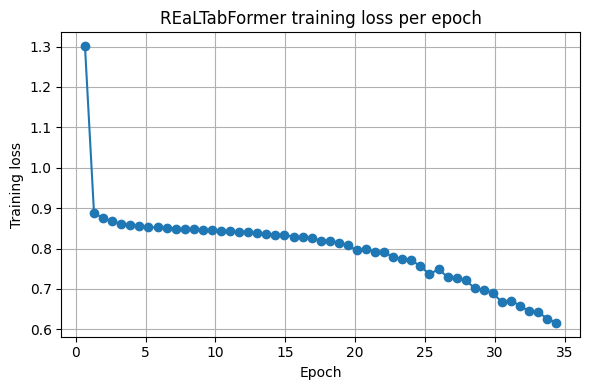

In [24]:
import os, glob, json
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Try both possible locations for trainer_state.json
state_files = []
state_files += glob.glob("./rtf_model/**/trainer_state.json", recursive=True)
state_files += glob.glob("./RTF_resources/rtf_model/**/trainer_state.json", recursive=True)

if not state_files:
    print("⚠️ No trainer_state.json found under ./rtf_model or ./RTF_resources/rtf_model")
    print("You need to re-train with rtf.fit(...) in this environment so the trainer can save logs.")
else:
    # Pick the newest state file (last modified)
    state_files = sorted(state_files, key=os.path.getmtime)
    state_path = state_files[-1]
    print("Using trainer state:", state_path)

    with open(state_path, "r") as f:
        state = json.load(f)

    log_hist = state.get("log_history", [])
    if not log_hist:
        print("⚠️ trainer_state.json has no log_history; nothing to plot.")
    else:
        # Aggregate loss per epoch (average over steps in that epoch)
        epoch_losses = defaultdict(list)
        for rec in log_hist:
            if "loss" in rec and "epoch" in rec:
                epoch_losses[rec["epoch"]].append(rec["loss"])

        epochs = sorted(epoch_losses.keys())
        mean_losses = [np.mean(epoch_losses[e]) for e in epochs]

        plt.figure(figsize=(6, 4))
        plt.plot(epochs, mean_losses, marker="o")
        plt.xlabel("Epoch")
        plt.ylabel("Training loss")
        plt.title("REaLTabFormer training loss per epoch")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


✅ Using existing `rtf` from memory.

Starting ALM search...


10112it [00:21, 468.58it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.18it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.99it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.95it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 475.51it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.40it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.92it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.29it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.20it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 474.22it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.82it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.28it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.93it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 470.93it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 476.60it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.77it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.73it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.85it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.46it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 474.70it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.84it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 466.88it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 466.92it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 461.61it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 476.13it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
[outer 0] best so far: T=0.9, top_p=0.95, Q=0.958, P=0.484, L=0.0916


10112it [00:21, 466.90it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.38it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 466.74it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.49it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 474.75it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.35it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 466.59it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.82it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 466.81it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 474.52it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.37it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.82it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.61it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 469.06it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 476.10it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 462.57it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.45it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.52it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.24it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 473.83it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.49it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.77it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.87it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.60it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 474.64it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
[outer 1] best so far: T=0.9, top_p=0.9, Q=0.949, P=0.516, L=0.1812


10112it [00:21, 467.68it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.89it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.26it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.95it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 476.74it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 469.29it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.69it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.79it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 464.29it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 476.39it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 469.31it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 469.06it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.62it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.89it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 476.69it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.16it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 469.17it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.75it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.64it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 475.09it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.21it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.27it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 468.43it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 467.98it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%


10112it [00:21, 475.52it/s]                          


Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
[outer 2] best so far: T=0.7, top_p=1.0, Q=0.964, P=0.502, L=0.2592

ALM search finished. Best config:
{'T': 0.7, 'top_p': 1.0, 'Q': 0.9642639256849819, 'P': 0.5015035426973085, 'L': 0.2592406085589728}
ALM losses per outer iteration: [0.09164455581019854, 0.18117387794501003, 0.2592406085589728]


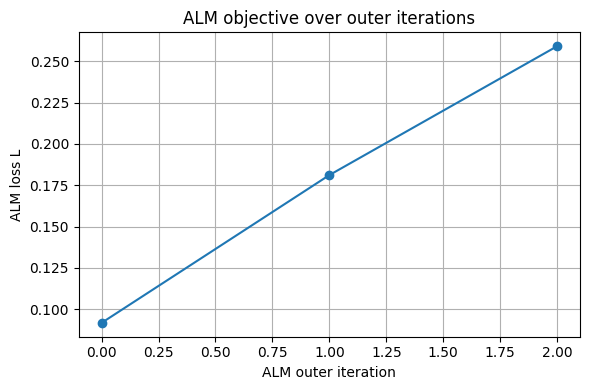

In [25]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make sure rtf exists (you must have trained it earlier in this session)
if "rtf" not in globals() or rtf is None:
    raise RuntimeError(
        "`rtf` is not defined.\n"
        "Run your training cell first, e.g.:\n"
        "  rtf = REaLTabFormer(...)\n"
        "  rtf.fit(train_df, device=...)\n"
    )
else:
    print("✅ Using existing `rtf` from memory.")

# Real training data (adjust path if needed)
REAL = pd.read_csv("./train.csv")

Pmin = 0.80
lam  = 0.0
mu   = 1.0
alpha_mu = 2.0
patience = 3

temps = [0.7, 0.9, 1.0, 1.1, 1.3]
topps = [0.90, 0.95, 0.98, 0.99, 1.0]

best = None
bad_rounds = 0
alm_losses = []   # store best L at each outer loop

print("\nStarting ALM search...")
for outer in range(3):
    results = []
    for T in temps:
        for Pcut in topps:
            n_synth = int(min(len(REAL), 10000))
            # Handle different RealTabFormer sample signatures
            try:
                syn_df = rtf.sample(n_samples=n_synth, temperature=T, top_p=Pcut)
            except TypeError:
                syn_df = rtf.sample(n=n_synth, temperature=T, top_p=Pcut)

            Q = score_quality_Q(REAL, syn_df)
            P = score_privacy_P(REAL, syn_df)

            gap = Pmin - P
            penalty = max(0.0, gap)
            L = (1.0 - Q) + lam * penalty + 0.5 * mu * (penalty ** 2)

            results.append({"T": T, "top_p": Pcut, "Q": Q, "P": P, "L": L})

    # pick best (T, top_p) for this outer iteration
    results = sorted(results, key=lambda r: r["L"])
    cand = results[0]
    alm_losses.append(cand["L"])

    print(
        f"[outer {outer}] best so far: "
        f"T={cand['T']}, top_p={cand['top_p']}, "
        f"Q={cand['Q']:.3f}, P={cand['P']:.3f}, L={cand['L']:.4f}"
    )

    # ALM updates for λ and μ
    if cand["P"] < Pmin:
        lam = lam + (Pmin - cand["P"])
        bad_rounds += 1
        if bad_rounds >= patience:
            mu *= alpha_mu
            bad_rounds = 0
    else:
        lam = max(0.0, lam * 0.5)
        bad_rounds = 0

    best = cand

print("\nALM search finished. Best config:")
print(best)
print("ALM losses per outer iteration:", alm_losses)

# ----- Plot ALM loss vs outer iteration -----
iters = list(range(len(alm_losses)))
plt.figure(figsize=(6, 4))
plt.plot(iters, alm_losses, marker="o")
plt.xlabel("ALM outer iteration")
plt.ylabel("ALM loss L")
plt.title("ALM objective over outer iterations")
plt.grid(True)
plt.tight_layout()
plt.show()



Starting FAST ALM search (for plotting)...


3072it [00:06, 466.53it/s]                          


Generated 0 invalid samples out of total 3072 samples generated. Sampling efficiency is: 100.0000%


3072it [00:06, 466.42it/s]                          


Generated 0 invalid samples out of total 3072 samples generated. Sampling efficiency is: 100.0000%


3072it [00:06, 467.40it/s]                          


Generated 0 invalid samples out of total 3072 samples generated. Sampling efficiency is: 100.0000%


3072it [00:06, 467.48it/s]                          


Generated 0 invalid samples out of total 3072 samples generated. Sampling efficiency is: 100.0000%
[outer 0] best so far: T=0.9, top_p=0.9, Q=0.927, P=0.556, L=0.1022


3072it [00:06, 467.76it/s]                          


Generated 0 invalid samples out of total 3072 samples generated. Sampling efficiency is: 100.0000%


3072it [00:06, 467.94it/s]                          


Generated 0 invalid samples out of total 3072 samples generated. Sampling efficiency is: 100.0000%


3072it [00:06, 467.13it/s]                          


Generated 0 invalid samples out of total 3072 samples generated. Sampling efficiency is: 100.0000%


3072it [00:06, 466.75it/s]                          


Generated 0 invalid samples out of total 3072 samples generated. Sampling efficiency is: 100.0000%
[outer 1] best so far: T=0.9, top_p=0.9, Q=0.939, P=0.549, L=0.1532


3072it [00:06, 465.97it/s]                          


Generated 0 invalid samples out of total 3072 samples generated. Sampling efficiency is: 100.0000%


3072it [00:06, 467.52it/s]                          


Generated 0 invalid samples out of total 3072 samples generated. Sampling efficiency is: 100.0000%


3072it [00:06, 466.48it/s]                          


Generated 0 invalid samples out of total 3072 samples generated. Sampling efficiency is: 100.0000%


3072it [00:06, 466.63it/s]                          


Generated 0 invalid samples out of total 3072 samples generated. Sampling efficiency is: 100.0000%
[outer 2] best so far: T=0.9, top_p=0.9, Q=0.926, P=0.514, L=0.2566

FAST ALM search finished. Best config:
{'T': 0.9, 'top_p': 0.9, 'Q': 0.9255984150291463, 'P': 0.5141916895569634, 'L': 0.2566305371917699}
ALM losses per outer iteration: [0.10217475370708132, 0.15323070432478297, 0.2566305371917699]


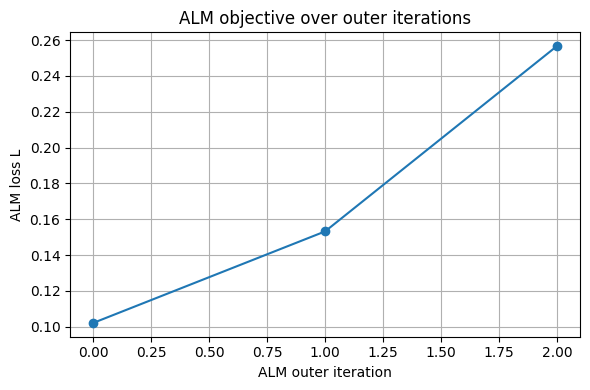

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make sure rtf, score_quality_Q, score_privacy_P are already defined from earlier cells
if "rtf" not in globals() or rtf is None:
    raise RuntimeError("`rtf` is not defined. Run your training cell first.")

# Load real data (same as your training data).32
REAL = pd.read_csv("./train.csv")

# ---- smaller ALM search for plotting ONLY ----
outer_iters = 3                 # number of outer iterations
temps       = [0.9, 1.1]        # fewer temps than before
topps       = [0.90, 0.99]      # fewer top_p values than before

Pmin     = 0.80
lam      = 0.0
mu       = 1.0
alpha_mu = 2.0
patience = 3

best = None
bad_rounds = 0
alm_losses = []   # store best L per outer iteration

print("\nStarting FAST ALM search (for plotting)...")
for outer in range(outer_iters):
    results = []
    for T in temps:
        for Pcut in topps:
            # fewer synthetic rows so it finishes quickly
            n_synth = int(min(len(REAL), 3000))

            try:
                syn_df = rtf.sample(n_samples=n_synth, temperature=T, top_p=Pcut)
            except TypeError:
                syn_df = rtf.sample(n=n_synth, temperature=T, top_p=Pcut)

            Q = score_quality_Q(REAL, syn_df)
            P = score_privacy_P(REAL, syn_df)

            gap = Pmin - P
            penalty = max(0.0, gap)
            L = (1.0 - Q) + lam * penalty + 0.5 * mu * (penalty ** 2)

            results.append({"T": T, "top_p": Pcut, "Q": Q, "P": P, "L": L})

    # pick best (T, top_p) for this outer iteration
    results = sorted(results, key=lambda r: r["L"])
    cand = results[0]
    alm_losses.append(cand["L"])

    print(
        f"[outer {outer}] best so far: "
        f"T={cand['T']}, top_p={cand['top_p']}, "
        f"Q={cand['Q']:.3f}, P={cand['P']:.3f}, L={cand['L']:.4f}"
    )

    # ALM updates
    if cand["P"] < Pmin:
        lam = lam + (Pmin - cand["P"])
        bad_rounds += 1
        if bad_rounds >= patience:
            mu *= alpha_mu
            bad_rounds = 0
    else:
        lam = max(0.0, lam * 0.5)
        bad_rounds = 0

    best = cand

print("\nFAST ALM search finished. Best config:")
print(best)
print("ALM losses per outer iteration:", alm_losses)

# ---- Plot ALM loss vs outer iteration ----
iters = list(range(len(alm_losses)))
plt.figure(figsize=(6, 4))
plt.plot(iters, alm_losses, marker="o")
plt.xlabel("ALM outer iteration")
plt.ylabel("ALM loss L")
plt.title("ALM objective over outer iterations")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Training-time optimization with ALM 

In [2]:
!pip install -q realtabformer transformers datasets scikit-learn scipy


In [3]:
from realtabformer import REaLTabFormer


In [10]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import torch

# ---- 1. Load your main training data (same train.csv you used before) ----
DATA_PATH = Path("./train.csv")
REAL_FULL = pd.read_csv(DATA_PATH)

print("Full real data shape:", REAL_FULL.shape)
print("Columns:", REAL_FULL.columns.tolist())

# ---- 2. Train / validation split (for hyperparameter tuning) ----
# This split is ONLY for choosing hyperparameters. Your real "test" set stays untouched.
train_inner_df, val_df = train_test_split(
    REAL_FULL,
    test_size=0.2,
    random_state=42,
    stratify=REAL_FULL["Target"]  # keep Target distribution similar
)

print("Inner-train shape:", train_inner_df.shape)
print("Validation shape :", val_df.shape)

# ---- 3. Device (CPU / GPU) ----
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)


Full real data shape: (39073, 15)
Columns: ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target']
Inner-train shape: (31258, 15)
Validation shape : (7815, 15)
Using device: cuda


In [11]:
from realtabformer import REaLTabFormer

# This assumes score_quality_Q(real_df, syn_df, target_col="Target") is already defined.


def train_and_eval_rtf(hparams, train_df, val_df, device="cpu", n_synth_val=2000):
    """
    One hyperparameter trial:
      - Build RTF model with hparams
      - Train on train_df
      - Sample synthetic data
      - Compute Q_val against val_df
    Returns:
      Q_val (float), trained rtf model
    """
    print(f"\nTraining trial with hparams: {hparams}")

    # 1) Build model with current hyperparameters
    rtf = REaLTabFormer(
        model_type="tabular",
        epochs=hparams["epochs"],
        batch_size=hparams["batch_size"],
        learning_rate=hparams["learning_rate"],
        logging_strategy="steps",
        logging_steps=50,
        report_to=[],   # disable external logging
    )

    # 2) Train on inner train split
    rtf.fit(train_df, device=device)

    # 3) Generate synthetic data for validation
    #    Use a moderate number of samples to keep it fast.
    try:
        syn_df = rtf.sample(n_samples=n_synth_val)
    except TypeError:
        syn_df = rtf.sample(n=n_synth_val)

    # 4) Compute Q_val: how close synthetic is to REAL validation data
    Q_val = score_quality_Q(val_df, syn_df, target_col="Target")
    print(f"Q_val for this trial = {Q_val:.4f}")

    return Q_val, rtf


In [12]:
!pip install -q optuna

import optuna

def objective(trial: optuna.Trial):
    # 1) Suggest hyperparameters for this trial
    lr = trial.suggest_loguniform("learning_rate", 1e-5, 5e-4)
    batch_size = trial.suggest_categorical("batch_size", [64, 128, 256])
    epochs = trial.suggest_int("epochs", 20, 50)

    hparams = {
        "learning_rate": lr,
        "batch_size": batch_size,
        "epochs": epochs,
    }

    # 2) Train and evaluate this hyperparameter set
    Q_val, _ = train_and_eval_rtf(
        hparams=hparams,
        train_df=train_inner_df,
        val_df=val_df,
        device=device,
        n_synth_val=2000,
    )

    # 3) We want to MAXIMIZE Q_val
    return Q_val

# Create a study to maximize Q
study = optuna.create_study(direction="maximize")

# Run optimization: you can increase n_trials later (e.g., 10, 20)
study.optimize(objective, n_trials=5)

print("\n=== Best trial from Bayesian Optimization ===")
print("  Best Q_val      :", study.best_value)
print("  Best parameters :", study.best_params)


[I 2025-12-18 19:46:09,660] A new study created in memory with name: no-name-38d2b7d0-bbe3-4607-b304-db3f558604f4



Training trial with hparams: {'learning_rate': 2.5692289857939687e-05, 'batch_size': 64, 'epochs': 47}
Computing the sensitivity threshold...
Using parallel computation!!!


/tmp/ipykernel_184/846332856.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("learning_rate", 1e-5, 5e-4)


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    5.000000e+02
mean    -3.104517e-05
std      1.656573e-03
min     -5.019003e-03
25%     -1.141361e-03
50%     -9.695559e-07
75%      1.057398e-03
max      4.562536e-03
dtype: float64
Sensitivity threshold: 0.002536093048882526 qt_max: 0.05


Map:   0%|          | 0/31258 [00:00<?, ? examples/s]

Step,Training Loss
50,1.676700
100,0.976300
150,0.933200
200,0.914800
250,0.902400
300,0.893200
350,0.889400
400,0.885300
450,0.880500
500,0.878300


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 5,                     sensitivity_threshold: 0.002536093048882526,                         val_sensitivity: 0.0017506431387757742,                             val_sensitivities: [0.0015483808415745588, 0.0015526468877254218, 0.00395210393639713, 0.003428543726973046, 0.0039268954818693046, 0.0028840411091719986, -0.0006591041303083189, 0.00389586969168121, 0.002818886949777002, 0.001608881132441342, 0.001265270506108202, 0.0017139809967035102, -0.0013668799689742096, -7.543145239480329e-05, -0.00023443862710878402]


Step,Training Loss
650,0.868900
700,0.868100
750,0.867200
800,0.864200
850,0.864400
900,0.862200
950,0.862000
1000,0.859400
1050,0.857200
1100,0.860700


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 10,                     sensitivity_threshold: 0.002536093048882526,                         val_sensitivity: -0.000712003102579019,                             val_sensitivities: [-0.0009534613147178592, -0.00035388791933294543, 0.0017112662400620513, 0.0002724452200891991, 2.4238898584448394e-05, -0.0018733759937948422, -0.0030170641846034517, 0.000251890634089587, -0.00046015125072716684, -0.002012992049641264, 0.0006459181694783789, 8.939305797944541e-05, -0.002618382780686446, -0.0010360674810936592, -0.001349815784370758]


Step,Training Loss
1250,0.857000
1300,0.854500
1350,0.853200
1400,0.855000
1450,0.852300
1500,0.850400
1550,0.849900
1600,0.853700
1650,0.850500
1700,0.849600


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 15,                     sensitivity_threshold: 0.002536093048882526,                         val_sensitivity: 0.0017796263977764854,                             val_sensitivities: [0.0025342253248012412, 0.0014933100639906922, 0.004778165600155129, 0.0016464999030444056, 0.003063990692262944, 0.0015429513282916424, -0.001224161334108978, 0.0021002520845452783, 0.0014203994570486723, 0.001212914485165794, 0.0023042466550319955, 0.0023752181500872604, 0.0004904013961605585, 0.0010903626139228235, 0.0018656195462478187]


Step,Training Loss
1850,0.842500
1900,0.848100
1950,0.848800
2000,0.845600
2050,0.845600
2100,0.847100
2150,0.847300
2200,0.844100
2250,0.843900
2300,0.844400


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Saving not-best model...
Critic round: 20,                     sensitivity_threshold: 0.002536093048882526,                         val_sensitivity: 0.002615047508241226,                             val_sensitivities: [0.003115958890828002, 0.004254605390731045, 0.005662012798138451, 0.0047579988365328675, 0.0055286019003296496, 0.002473725033934458, -0.0013164630599185572, 0.0031656001551289502, 0.0028316850882295908, 0.002549350397517937, 0.002068838471979833, 0.002871242970719411, -0.0004834205933682372, 0.0009647081636610432, 0.0007812681791739382]


Step,Training Loss
2500,0.842000
2550,0.840900
2600,0.842400
2650,0.840700
2700,0.842300
2750,0.838100
2800,0.841700
2850,0.838900
2900,0.838400
2950,0.840000


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%
Critic round: 25,                     sensitivity_threshold: 0.002536093048882526,                         val_sensitivity: 0.003047883136190291,                             val_sensitivities: [0.002073880162885398, 0.002982160170641846, 0.004420981190614699, 0.0027692456854760523, 0.0033738607717665316, 0.004427186348652317, 0.0006722900911382587, 0.005102772929998061, 0.004703703703703704, 0.004069614116734535, 0.0028778359511343805, 0.0034739189451231337, 0.001688384719798333, 0.0015507077758386656, 0.0015317044793484588]
Stopping training, no improvement in critic...


  0%|          | 0/2000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 2048 samples generated. Sampling efficiency is: 100.0000%


[I 2025-12-18 19:57:39,862] Trial 0 finished with value: 0.9664702674214489 and parameters: {'learning_rate': 2.5692289857939687e-05, 'batch_size': 64, 'epochs': 47}. Best is trial 0 with value: 0.9664702674214489.


Q_val for this trial = 0.9665

Training trial with hparams: {'learning_rate': 9.818790166294899e-05, 'batch_size': 64, 'epochs': 22}
Computing the sensitivity threshold...
Using parallel computation!!!


/tmp/ipykernel_184/846332856.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("learning_rate", 1e-5, 5e-4)


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    500.000000
mean       0.000185
std        0.001672
min       -0.006259
25%       -0.000865
50%        0.000147
75%        0.001242
max        0.004952
dtype: float64
Sensitivity threshold: 0.0029746170254023635 qt_max: 0.05


Map:   0%|          | 0/31258 [00:00<?, ? examples/s]

Step,Training Loss
50,1.333700
100,0.913400
150,0.891400
200,0.881300
250,0.875500
300,0.869900
350,0.867800
400,0.866600
450,0.861800
500,0.861600


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 5,                     sensitivity_threshold: 0.0029746170254023635,                         val_sensitivity: -0.0005491952685669962,                             val_sensitivities: [-0.0010205545859996122, -0.0012055458599961215, 0.0005710684506496024, 0.0006307930967616831, 0.0011431064572425828, 0.0009968974209811907, -0.0029852627496606554, 0.0013191778165600157, 0.0008297459763428353, -0.0014440566220670931, -0.0002491758774481287, -0.0005788248981966259, -0.003406437851464029, -0.000870467325964708, -0.0019683924762458798]


Step,Training Loss
650,0.855400
700,0.854400
750,0.854200
800,0.851100
850,0.852200
900,0.850700
950,0.850200
1000,0.848000
1050,0.845800
1100,0.849500


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 10,                     sensitivity_threshold: 0.0029746170254023635,                         val_sensitivity: -0.0014131859608299399,                             val_sensitivities: [-0.0016918751211944926, -0.0010950164824510373, 0.0007533449680046541, -0.00014834205933682377, 0.00036940081442699257, -0.0015732014737250336, -0.00350921078146209, -0.0002441341865425634, -0.0005004847779716888, -0.0022231917781656008, -0.001202055458599961, -0.0012811712235796006, -0.0035774675198758958, -0.0023977118479736282, -0.0028766724840023263]


Step,Training Loss
1250,0.845500
1300,0.843600
1350,0.842600
1400,0.843800
1450,0.841500
1500,0.839400
1550,0.838200
1600,0.842000
1650,0.838100
1700,0.837100


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 15,                     sensitivity_threshold: 0.0029746170254023635,                         val_sensitivity: 0.0006853984874927284,                             val_sensitivities: [0.0012435524529765365, 0.0008646499903044411, 0.003226488268373085, 0.0009534613147178592, 0.0015991855730075628, 9.714950552646897e-05, -0.0017585805700988946, 0.0012470428543726972, 0.0008258677525693234, 0.000690905565251115, 0.000767306573589296, 0.0014382392864068258, -0.0007762264882683731, -0.0005462478184991273, 0.0004081830521621097]


Step,Training Loss
1850,0.827700
1900,0.833000
1950,0.833900
2000,0.829800
2050,0.828700
2100,0.830100
2150,0.828800
2200,0.825600
2250,0.824100
2300,0.823800


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 20,                     sensitivity_threshold: 0.0029746170254023635,                         val_sensitivity: 0.0029746105616960767,                             val_sensitivities: [0.0028999418266433975, 0.0039373666860577855, 0.005545666084933102, 0.004067287182470428, 0.005249757611014155, 0.003515803761877061, 0.0011221640488656196, 0.004476827612953267, 0.004455109559821602, 0.003573589296102386, 0.0011733566026759744, 0.002635834787667249, 0.00010645724258289698, 0.0013827806864456077, 0.00047721543533061863]


Step,Training Loss
2500,0.817800
2550,0.816700
2600,0.817800
2650,0.815600
2700,0.815700


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%
Critic round: 25,                     sensitivity_threshold: 0.0029746170254023635,                         val_sensitivity: 0.0029033029539137748,                             val_sensitivities: [0.0033133604808997484, 0.00491390343222804, 0.005619740159007176, 0.004182082606166376, 0.005148148148148149, 0.0020428543726973046, 5.48768663951911e-05, 0.0029635446965289897, 0.0030779522978475853, 0.0017314330036843125, 0.0032586775256932326, 0.003182276517355052, 0.0003092883459375607, 0.0018074461896451424, 0.0019439596664727553]


  0%|          | 0/2000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 2048 samples generated. Sampling efficiency is: 100.0000%


[I 2025-12-18 20:08:43,099] Trial 1 finished with value: 0.9766303487371945 and parameters: {'learning_rate': 9.818790166294899e-05, 'batch_size': 64, 'epochs': 22}. Best is trial 1 with value: 0.9766303487371945.


Q_val for this trial = 0.9766

Training trial with hparams: {'learning_rate': 1.2793745330501145e-05, 'batch_size': 128, 'epochs': 46}
Computing the sensitivity threshold...
Using parallel computation!!!


/tmp/ipykernel_184/846332856.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("learning_rate", 1e-5, 5e-4)


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    500.000000
mean      -0.000011
std        0.001660
min       -0.004098
25%       -0.001126
50%       -0.000014
75%        0.001061
max        0.005431
dtype: float64
Sensitivity threshold: 0.0027853403141361245 qt_max: 0.05


Map:   0%|          | 0/31258 [00:00<?, ? examples/s]

Step,Training Loss
50,2.084100
100,1.041600
150,0.970500
200,0.944000
250,0.927700
300,0.914700


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 5,                     sensitivity_threshold: 0.0027853403141361245,                         val_sensitivity: 0.0008495249175877448,                             val_sensitivities: [0.0015883265464417295, 0.0016709327128175294, 0.0030492534419235984, 0.0030519681985650576, 0.0030876478572813646, 0.0009018809385301531, -0.0016980802792321116, 0.002233275159976731, 0.001314911770409153, 0.00023792902850494475, 0.000675004847779717, -0.00035350009695559446, -0.0010492534419235988, -0.0008188869497770021, -0.0011485359705254992]


Step,Training Loss
350,0.904600
400,0.899100
450,0.895200
500,0.889800
550,0.886600
600,0.882500


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 10,                     sensitivity_threshold: 0.0027853403141361245,                         val_sensitivity: -0.00012277163725680297,                             val_sensitivities: [-0.0020277292999806083, -0.0005613728912158231, 0.00031898390537134024, -0.0004729493891797559, -1.9197207678882944e-05, -0.0007936784952491757, -0.002337599379484196, 0.0010112468489431841, 0.0015351948807446187, -0.0009670350979251502, 0.0012144657746751986, 0.0016251696722900913, -0.0011085902656583282, 0.0005908473918945122, 0.0001506689936009308]


Step,Training Loss
650,0.881200
700,0.879200
750,0.875900
800,0.874300
850,0.873700
900,0.871000


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 15,                     sensitivity_threshold: 0.0027853403141361245,                         val_sensitivity: 0.0018705319630276003,                             val_sensitivities: [0.0028122939693620325, 0.0033560209424083774, 0.0049914679076982745, 0.002562924180725228, 0.0038570874539460925, 0.001806282722513089, -0.0003558270312197014, 0.0033152995927865038, 0.0024900135737832073, 0.0018299398875315104, 0.0016592980414969942, -0.0002584836145045569, -0.0004198177234826449, 0.00044890440178398306, -3.742485941438819e-05]


Step,Training Loss
950,0.869300
1000,0.868400
1050,0.867300
1100,0.867700
1150,0.865000
1200,0.864200


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Saving not-best model...
Critic round: 20,                     sensitivity_threshold: 0.0027853403141361245,                         val_sensitivity: 0.0033417490789218536,                             val_sensitivities: [0.0038947062245491566, 0.004503587356990499, 0.006681985650572039, 0.004922047702152413, 0.005022493697886368, 0.00279833236377739, -0.0002065154159394996, 0.0043538879193329464, 0.0029270893930579793, 0.0030162885398487493, 0.0030166763622261005, 0.003692650765949195, 0.0016123715338375027, 0.0023558270312197017, 0.0015348070583672678]


Step,Training Loss
1250,0.866200
1300,0.862100
1350,0.861600
1400,0.860600
1450,0.860100
1500,0.860200
1550,0.858400


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 25,                     sensitivity_threshold: 0.0027853403141361245,                         val_sensitivity: 0.002560002585482516,                             val_sensitivities: [0.0009076982741904208, 0.002433391506689936, 0.002793290672871824, 0.0019621873182082607, 0.002763428349815784, 0.00440159007174714, 0.0021545472173744424, 0.005344386271087841, 0.006019197207678883, 0.004105681597828195, 0.0021964320341283693, 0.0031372891215823147, -0.00034341671514446386, 0.0003023075431452397, 0.00022202831103354675]


Step,Training Loss
1600,0.858600
1650,0.858400
1700,0.858300
1750,0.857600
1800,0.856500
1850,0.856200


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 30,                     sensitivity_threshold: 0.0027853403141361245,                         val_sensitivity: 0.0034745136061017385,                             val_sensitivities: [0.0024221446577467522, 0.0024667442311421366, 0.0056945898778359505, 0.004073880162885399, 0.0039676168314911765, 0.002941438821019973, 0.0005381035485747529, 0.004289509404692651, 0.004439596664727556, 0.0038943184021718058, 0.004717665309288346, 0.003559239868140392, 0.0017581927477215438, 0.004423308124878805, 0.0029313554392088425]


Step,Training Loss
1900,0.856700
1950,0.854600
2000,0.855600
2050,0.854300
2100,0.854300
2150,0.854800


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 35,                     sensitivity_threshold: 0.0027853403141361245,                         val_sensitivity: 0.002748251567448775,                             val_sensitivities: [0.003005817335660268, 0.003137289121582315, 0.004350009695559434, 0.003759744037230948, 0.0034723676556137283, 0.001107814620903626, -0.001632538297459763, 0.00130095016482451, 0.0023344968004653873, 0.000851851851851852, 0.0058547605196819855, 0.004456660849331007, 0.0027199922435524526, 0.004096761683149118, 0.0024077952297847584]


Step,Training Loss
2200,0.852100
2250,0.853700
2300,0.854200
2350,0.852900
2400,0.853900
2450,0.853600


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 40,                     sensitivity_threshold: 0.0027853403141361245,                         val_sensitivity: 0.0027797944541400037,                             val_sensitivities: [0.0005377157261974016, 0.0005881326352530543, 0.0024919526856699635, 0.001917975567190227, 0.00218014349427962, 0.003778747333721155, 0.001999030444056622, 0.006821601706418461, 0.0055987977506302125, 0.005063990692262943, 0.0031578437075819275, 0.002761101415551678, 0.0011869303858832658, 0.001755090168702734, 0.0018578630987007951]


Step,Training Loss
2500,0.851500
2550,0.853300
2600,0.852000
2650,0.850600
2700,0.853700
2750,0.850200


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 45,                     sensitivity_threshold: 0.0027853403141361245,                         val_sensitivity: 0.0026611466614957016,                             val_sensitivities: [0.001586387434554974, 0.0012730269536552264, 0.00369071165406244, 0.003562342447159201, 0.0031109171999224357, 0.0029480318014349434, 0.00037327903820050424, 0.004270893930579795, 0.003475082412255187, 0.003910219119643204, 0.0028471979833236388, 0.0036957533449680047, 0.0005063021136319566, 0.002605584642233857, 0.002061469846810161]


Step,Training Loss
2800,0.849400
2850,0.851600


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%
Critic round: 50,                     sensitivity_threshold: 0.0027853403141361245,                         val_sensitivity: 0.0024366233598345295,                             val_sensitivities: [0.0025094046926507655, 0.001680628272251309, 0.004255768857863099, 0.0037066123715338377, 0.003861741322474307, 0.001529377545084351, -0.0011772348264494864, 0.00264320341283692, 0.0031097537327903825, 0.0006928446771378709, 0.003953655225906535, 0.0039466744231142145, 0.0009208842350203608, 0.0024492922241613345, 0.0024667442311421366]


  0%|          | 0/2000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 2048 samples generated. Sampling efficiency is: 100.0000%


[I 2025-12-18 20:28:19,925] Trial 2 finished with value: 0.9643407420625625 and parameters: {'learning_rate': 1.2793745330501145e-05, 'batch_size': 128, 'epochs': 46}. Best is trial 1 with value: 0.9766303487371945.


Q_val for this trial = 0.9643

Training trial with hparams: {'learning_rate': 4.249026595220931e-05, 'batch_size': 256, 'epochs': 25}
Computing the sensitivity threshold...
Using parallel computation!!!


/tmp/ipykernel_184/846332856.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("learning_rate", 1e-5, 5e-4)


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    500.000000
mean      -0.000063
std        0.001670
min       -0.004687
25%       -0.001125
50%       -0.000068
75%        0.001053
max        0.004888
dtype: float64
Sensitivity threshold: 0.0027540184017686995 qt_max: 0.05


Map:   0%|          | 0/31258 [00:00<?, ? examples/s]

Step,Training Loss
50,1.450300
100,0.927000
150,0.897700


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 5,                     sensitivity_threshold: 0.0027540184017686995,                         val_sensitivity: -0.0001675780492534416,                             val_sensitivities: [-0.00018363389567578042, -0.0003313942214465775, 0.0013661043242195082, 0.001255574946674423, 0.0015340314136125654, 0.0005621485359705256, -0.0018062827225130886, 0.0017504363001745202, 0.0017880550707775845, 0.000700213302307543, -0.0009154547217374441, -0.0016476633701764589, -0.0023503975179367843, -0.0016278844289315491, -0.0026075237541206124]


Step,Training Loss
200,0.883200
250,0.876900
300,0.871100


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 10,                     sensitivity_threshold: 0.0027540184017686995,                         val_sensitivity: 0.001756382909960571,                             val_sensitivities: [0.001172193135543921, 0.0014471592010859024, 0.004174326158619351, 0.0020824122551871245, 0.0030860965677719605, 0.0017787473337211562, -6.418460345161926e-05, 0.003311033546635641, 0.0028297459763428345, 0.001893154935039752, 0.001984681016094628, 0.0017678883071553225, -0.0009243746364165213, 0.0006172193135543921, 0.0011896451425247236]


Step,Training Loss
350,0.867400
400,0.863800
450,0.861700


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 15,                     sensitivity_threshold: 0.0027540184017686995,                         val_sensitivity: 0.0017270893930579794,                             val_sensitivities: [0.0027812681791739386, 0.0034467713787085514, 0.005815590459569518, 0.0028537909637386077, 0.004445801822765174, 0.000906146984681016, -0.0018008532092301723, 0.0014808997479154543, 0.0009185573007562536, -0.0003248012410316075, 0.0016794648051192552, 0.0012198952879581152, 0.0006742292030250147, 0.000574171029668412, 0.0012354081830521623]


Step,Training Loss
500,0.859300
550,0.858000
600,0.856100


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 20,                     sensitivity_threshold: 0.0027540184017686995,                         val_sensitivity: 0.0026363518841703844,                             val_sensitivities: [0.003349040139616056, 0.0037124297071941047, 0.005573977118479736, 0.004704867170835758, 0.004936784952491759, 0.0030252084545278257, 6.030637967810752e-05, 0.004009889470622455, 0.0034556912933876287, 0.0034553034710102766, 0.0009965095986038395, 0.0018566996315687418, -0.0006017064184603451, 0.0007355051386465, 0.00027477215435330635]


Step,Training Loss
650,0.855200
700,0.854500
750,0.853900


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%
Critic round: 25,                     sensitivity_threshold: 0.0027540184017686995,                         val_sensitivity: 0.001939228233469071,                             val_sensitivities: [0.0004997091332169866, 0.0017574171029668413, 0.0030562342447159195, 0.001713205351948807, 0.0020789218537909638, 0.002915842544114795, 0.0008541787861159589, 0.004773899554004266, 0.004358153965483808, 0.002750630211363195, 0.001931549350397518, 0.00254392088423502, -0.0006656971107232886, 0.0007374442505332557, -0.00021698662012798137]


  0%|          | 0/2000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 2048 samples generated. Sampling efficiency is: 100.0000%


[I 2025-12-18 20:40:12,506] Trial 3 finished with value: 0.968562097647812 and parameters: {'learning_rate': 4.249026595220931e-05, 'batch_size': 256, 'epochs': 25}. Best is trial 1 with value: 0.9766303487371945.


Q_val for this trial = 0.9686

Training trial with hparams: {'learning_rate': 1.374776448587977e-05, 'batch_size': 128, 'epochs': 22}
Computing the sensitivity threshold...
Using parallel computation!!!


/tmp/ipykernel_184/846332856.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("learning_rate", 1e-5, 5e-4)


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    500.000000
mean       0.000108
std        0.001584
min       -0.004878
25%       -0.000996
50%        0.000093
75%        0.001207
max        0.004599
dtype: float64
Sensitivity threshold: 0.002813030831878998 qt_max: 0.05


Map:   0%|          | 0/31258 [00:00<?, ? examples/s]

Step,Training Loss
50,2.033800
100,1.032900
150,0.966800
200,0.941700
250,0.926300
300,0.913900


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 5,                     sensitivity_threshold: 0.002813030831878998,                         val_sensitivity: 0.0005792644302242907,                             val_sensitivities: [0.0011939111886755866, 0.0011562924180725225, 0.0024752763234438626, 0.0028801628853984866, 0.0027894124490983126, 0.0007025402365716502, -0.0019486135350009696, 0.0016329261198371142, 0.0010814426992437462, 0.00011692844677137867, 0.00023211169284467734, -0.0002681791739383363, -0.0012629435718440954, -0.0007568353694008143, -0.001335466356408765]


Step,Training Loss
350,0.904500
400,0.899400
450,0.895800
500,0.890800
550,0.887800
600,0.884000


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 10,                     sensitivity_threshold: 0.002813030831878998,                         val_sensitivity: 0.001594686833430289,                             val_sensitivities: [-0.00019139034322280382, 0.0007145627302695368, 0.002915066899360093, 0.0012338568935427573, 0.0018947062245491563, 0.0017477215435330623, 2.6178010471204164e-05, 0.0026579406631762653, 0.0027688578630987015, 0.0009212720573977117, 0.002817335660267598, 0.003278068644560791, -0.00013709521039363963, 0.0019218537909637384, 0.0013513670738801629]


Step,Training Loss
650,0.883300
700,0.881300
750,0.878300
800,0.877300
850,0.876900
900,0.874600


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 15,                     sensitivity_threshold: 0.002813030831878998,                         val_sensitivity: 0.00196759097666602,                             val_sensitivities: [0.0024667442311421366, 0.00369109947643979, 0.0058392476245879375, 0.0033366298235408187, 0.004534613147178592, 0.0009701376769439599, -0.0017965871630793093, 0.002443862710878418, 0.0012575140585611789, 0.0005912352142718636, 0.0025621485359705255, 0.0007572231917781655, 0.0005039751793678496, 0.0013075431452394804, 0.0010484777971688968]


Step,Training Loss
950,0.873300
1000,0.872400
1050,0.871900
1100,0.872600
1150,0.870400
1200,0.870100


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Saving not-best model...
Critic round: 20,                     sensitivity_threshold: 0.002813030831878998,                         val_sensitivity: 0.0038153577661431065,                             val_sensitivities: [0.004567578049253442, 0.004716501842156292, 0.007025596276905177, 0.005197013767694396, 0.0062375412061275925, 0.004367849524917588, 0.001886561954624782, 0.006735892961023852, 0.0057876672484002325, 0.0047033158813263535, 0.0019292224161334107, 0.002261586193523366, -0.00011576497963932512, 0.0010570098894706224, 0.0008727942602288153]


Step,Training Loss
1250,0.872900
1300,0.869100
1350,0.869100


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%
Saving not-best model...
Critic round: 25,                     sensitivity_threshold: 0.002813030831878998,                         val_sensitivity: 0.0034316721608170122,                             val_sensitivities: [0.0037166957533449675, 0.005546441729687803, 0.00644114795423696, 0.005332751599767307, 0.005052743843319759, 0.0024795423695947254, 0.0005574946674423116, 0.003898972270700019, 0.00306282722513089, 0.0030864843901493117, 0.0030232693426410708, 0.004010277292999806, 0.0006955594337793289, 0.002410122164048866, 0.0021607523754120614]
Stopping training, no improvement in critic...


  0%|          | 0/2000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 2048 samples generated. Sampling efficiency is: 100.0000%


[I 2025-12-18 20:51:05,123] Trial 4 finished with value: 0.9681576015463259 and parameters: {'learning_rate': 1.374776448587977e-05, 'batch_size': 128, 'epochs': 22}. Best is trial 1 with value: 0.9766303487371945.


Q_val for this trial = 0.9682

=== Best trial from Bayesian Optimization ===
  Best Q_val      : 0.9766303487371945
  Best parameters : {'learning_rate': 9.818790166294899e-05, 'batch_size': 64, 'epochs': 22}


In [13]:
import random

# -------- Bandit-style hyperparameter search (lighter version) --------

# Search space for the bandit method
LR_CHOICES = [1e-5, 5e-5, 1e-4, 2e-4, 5e-4]
BATCH_CHOICES = [64, 128, 256]

# Make this small so it doesn't take forever
N_TRIALS_STAGE1 = 4    # how many random configs to test quickly
TOP_K = 2              # how many best configs to keep for full training

results_stage1 = []

print("\n=== Bandit Stage 1: quick screening with fewer epochs ===")
for i in range(N_TRIALS_STAGE1):
    # Random hyperparameters for this quick trial
    lr = random.choice(LR_CHOICES)
    batch_size = random.choice(BATCH_CHOICES)
    epochs = 8   # fewer epochs = cheap early check

    hparams = {
        "learning_rate": lr,
        "batch_size": batch_size,
        "epochs": epochs,
    }

    print(f"\n[Stage 1 - Trial {i+1}/{N_TRIALS_STAGE1}]  hparams={hparams}")
    Q_val, _ = train_and_eval_rtf(
        hparams=hparams,
        train_df=train_inner_df,
        val_df=val_df,
        device=device,
        n_synth_val=800,  # fewer samples to keep it fast
    )

    results_stage1.append({
        "hparams": hparams,
        "Q_val": Q_val,
    })

# Sort by Q_val descending and keep TOP_K
results_stage1_sorted = sorted(results_stage1, key=lambda x: x["Q_val"], reverse=True)
top_candidates = results_stage1_sorted[:TOP_K]

print("\nTop configs from Stage 1:")
for c in top_candidates:
    print("  Q_val={:.4f}  hparams={}".format(c["Q_val"], c["hparams"]))

# ---- Stage 2: retrain top candidates with more epochs ----
print("\n=== Bandit Stage 2: full training on top candidates ===")
best_bandit_Q = -1e9
best_bandit_hparams = None
best_bandit_model = None

for idx, cand in enumerate(top_candidates):
    # Increase epochs for full training (still not too large)
    full_hparams = cand["hparams"].copy()
    full_hparams["epochs"] = 25

    print(f"\n[Stage 2 - Candidate {idx+1}/{TOP_K}]  full_hparams={full_hparams}")
    Q_val_full, rtf_model = train_and_eval_rtf(
        hparams=full_hparams,
        train_df=train_inner_df,
        val_df=val_df,
        device=device,
        n_synth_val=1500,
    )

    if Q_val_full > best_bandit_Q:
        best_bandit_Q = Q_val_full
        best_bandit_hparams = full_hparams
        best_bandit_model = rtf_model

print("\n=== Best result from Bandit Search ===")
print("  Best Q_val      :", best_bandit_Q)
print("  Best parameters :", best_bandit_hparams)



=== Bandit Stage 1: quick screening with fewer epochs ===

[Stage 1 - Trial 1/4]  hparams={'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 8}

Training trial with hparams: {'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 8}
Computing the sensitivity threshold...
Using parallel computation!!!


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    500.000000
mean       0.000026
std        0.001666
min       -0.004468
25%       -0.001048
50%        0.000040
75%        0.001112
max        0.005182
dtype: float64
Sensitivity threshold: 0.002843102295341721 qt_max: 0.05


Map:   0%|          | 0/31258 [00:00<?, ? examples/s]

Step,Training Loss
50,2.310000
100,1.116900
150,1.007700
200,0.973800
250,0.955300
300,0.940400
350,0.933700
400,0.926800
450,0.920300
500,0.915900


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 5,                     sensitivity_threshold: 0.002843102295341721,                         val_sensitivity: 0.0016719410509986425,                             val_sensitivities: [0.0032191196432034136, 0.0031388404110917205, 0.004595113438045376, 0.004987977506302113, 0.005157843707581928, 0.0014394027535388793, -0.0007525693232499514, 0.0029759550126042273, 0.0023282916424277682, 0.001071359317432616, 0.0008386658910219119, -0.0003697886368043437, -0.0014622842738025981, -0.0005900717471398099, -0.0014987395772736087]


Step,Training Loss
650,0.904400
700,0.903300
750,0.902300
800,0.899900
850,0.899900
900,0.898100
950,0.898700


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%
Saving not-best model...
Critic round: 10,                     sensitivity_threshold: 0.002843102295341721,                         val_sensitivity: 0.004110025208454529,                             val_sensitivities: [0.0022131083963544697, 0.003411479542369595, 0.004291448516579407, 0.004374054682955206, 0.005129532674035292, 0.0045702928058948995, 0.0024512313360480903, 0.005869109947643978, 0.005122939693620322, 0.004382974597634284, 0.0046788830715532295, 0.004975567190226877, 0.00279833236377739, 0.0040700019391118865, 0.0033114213690129918]


  0%|          | 0/800 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 896 samples generated. Sampling efficiency is: 100.0000%
Q_val for this trial = 0.9501

[Stage 1 - Trial 2/4]  hparams={'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 8}

Training trial with hparams: {'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 8}
Computing the sensitivity threshold...
Using parallel computation!!!


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    500.000000
mean       0.000139
std        0.001682
min       -0.006122
25%       -0.001063
50%       -0.000009
75%        0.001370
max        0.005544
dtype: float64
Sensitivity threshold: 0.0029025014543339147 qt_max: 0.05


Map:   0%|          | 0/31258 [00:00<?, ? examples/s]

Step,Training Loss
50,2.310000
100,1.116900
150,1.007700
200,0.973800
250,0.955300
300,0.940400
350,0.933700
400,0.926800
450,0.920300
500,0.915900


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 5,                     sensitivity_threshold: 0.0029025014543339147,                         val_sensitivity: 0.0016719410509986425,                             val_sensitivities: [0.0032191196432034136, 0.0031388404110917205, 0.004595113438045376, 0.004987977506302113, 0.005157843707581928, 0.0014394027535388793, -0.0007525693232499514, 0.0029759550126042273, 0.0023282916424277682, 0.001071359317432616, 0.0008386658910219119, -0.0003697886368043437, -0.0014622842738025981, -0.0005900717471398099, -0.0014987395772736087]


Step,Training Loss
650,0.904400
700,0.903300
750,0.902300
800,0.899900
850,0.899900
900,0.898100
950,0.898700


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%
Saving not-best model...
Critic round: 10,                     sensitivity_threshold: 0.0029025014543339147,                         val_sensitivity: 0.004110025208454529,                             val_sensitivities: [0.0022131083963544697, 0.003411479542369595, 0.004291448516579407, 0.004374054682955206, 0.005129532674035292, 0.0045702928058948995, 0.0024512313360480903, 0.005869109947643978, 0.005122939693620322, 0.004382974597634284, 0.0046788830715532295, 0.004975567190226877, 0.00279833236377739, 0.0040700019391118865, 0.0033114213690129918]


  0%|          | 0/800 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 896 samples generated. Sampling efficiency is: 100.0000%
Q_val for this trial = 0.9501

[Stage 1 - Trial 3/4]  hparams={'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 8}

Training trial with hparams: {'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 8}
Computing the sensitivity threshold...
Using parallel computation!!!


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    500.000000
mean       0.000016
std        0.001651
min       -0.004843
25%       -0.001062
50%        0.000013
75%        0.001001
max        0.006108
dtype: float64
Sensitivity threshold: 0.0028427186348652317 qt_max: 0.05


Map:   0%|          | 0/31258 [00:00<?, ? examples/s]

Step,Training Loss
50,2.310000
100,1.116900
150,1.007700
200,0.973800
250,0.955300
300,0.940400
350,0.933700
400,0.926800
450,0.920300
500,0.915900


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 5,                     sensitivity_threshold: 0.0028427186348652317,                         val_sensitivity: 0.0016719410509986425,                             val_sensitivities: [0.0032191196432034136, 0.0031388404110917205, 0.004595113438045376, 0.004987977506302113, 0.005157843707581928, 0.0014394027535388793, -0.0007525693232499514, 0.0029759550126042273, 0.0023282916424277682, 0.001071359317432616, 0.0008386658910219119, -0.0003697886368043437, -0.0014622842738025981, -0.0005900717471398099, -0.0014987395772736087]


Step,Training Loss
650,0.904400
700,0.903300
750,0.902300
800,0.899900
850,0.899900
900,0.898100
950,0.898700


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%
Saving not-best model...
Critic round: 10,                     sensitivity_threshold: 0.0028427186348652317,                         val_sensitivity: 0.004110025208454529,                             val_sensitivities: [0.0022131083963544697, 0.003411479542369595, 0.004291448516579407, 0.004374054682955206, 0.005129532674035292, 0.0045702928058948995, 0.0024512313360480903, 0.005869109947643978, 0.005122939693620322, 0.004382974597634284, 0.0046788830715532295, 0.004975567190226877, 0.00279833236377739, 0.0040700019391118865, 0.0033114213690129918]


  0%|          | 0/800 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 896 samples generated. Sampling efficiency is: 100.0000%
Q_val for this trial = 0.9501

[Stage 1 - Trial 4/4]  hparams={'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 8}

Training trial with hparams: {'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 8}
Computing the sensitivity threshold...
Using parallel computation!!!


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    500.000000
mean       0.000067
std        0.001688
min       -0.003965
25%       -0.001112
50%        0.000085
75%        0.001134
max        0.005672
dtype: float64
Sensitivity threshold: 0.002866723771345798 qt_max: 0.05


Map:   0%|          | 0/31258 [00:00<?, ? examples/s]

Step,Training Loss
50,2.310000
100,1.116900
150,1.007700
200,0.973800
250,0.955300
300,0.940400
350,0.933700
400,0.926800
450,0.920300
500,0.915900


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 5,                     sensitivity_threshold: 0.002866723771345798,                         val_sensitivity: 0.0016719410509986425,                             val_sensitivities: [0.0032191196432034136, 0.0031388404110917205, 0.004595113438045376, 0.004987977506302113, 0.005157843707581928, 0.0014394027535388793, -0.0007525693232499514, 0.0029759550126042273, 0.0023282916424277682, 0.001071359317432616, 0.0008386658910219119, -0.0003697886368043437, -0.0014622842738025981, -0.0005900717471398099, -0.0014987395772736087]


Step,Training Loss
650,0.904400
700,0.903300
750,0.902300
800,0.899900
850,0.899900
900,0.898100
950,0.898700


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%
Saving not-best model...
Critic round: 10,                     sensitivity_threshold: 0.002866723771345798,                         val_sensitivity: 0.004110025208454529,                             val_sensitivities: [0.0022131083963544697, 0.003411479542369595, 0.004291448516579407, 0.004374054682955206, 0.005129532674035292, 0.0045702928058948995, 0.0024512313360480903, 0.005869109947643978, 0.005122939693620322, 0.004382974597634284, 0.0046788830715532295, 0.004975567190226877, 0.00279833236377739, 0.0040700019391118865, 0.0033114213690129918]


  0%|          | 0/800 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 896 samples generated. Sampling efficiency is: 100.0000%
Q_val for this trial = 0.9501

Top configs from Stage 1:
  Q_val=0.9501  hparams={'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 8}
  Q_val=0.9501  hparams={'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 8}

=== Bandit Stage 2: full training on top candidates ===

[Stage 2 - Candidate 1/2]  full_hparams={'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 25}

Training trial with hparams: {'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 25}
Computing the sensitivity threshold...
Using parallel computation!!!


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    500.000000
mean       0.000082
std        0.001605
min       -0.004107
25%       -0.000927
50%        0.000008
75%        0.001098
max        0.005528
dtype: float64
Sensitivity threshold: 0.002753572420323889 qt_max: 0.05


Map:   0%|          | 0/31258 [00:00<?, ? examples/s]

Step,Training Loss
50,2.303900
100,1.110500
150,1.002500
200,0.968500
250,0.949600
300,0.934300
350,0.927000
400,0.919200
450,0.911700
500,0.907000


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 5,                     sensitivity_threshold: 0.002753572420323889,                         val_sensitivity: 0.0010284920173227329,                             val_sensitivities: [0.0012547993019197206, 0.0011884816753926703, 0.0037384138064766336, 0.003197789412449099, 0.0034114795423695944, 0.0010329649020748496, -0.0008254799301919721, 0.002453170447934846, 0.0027114601512507274, 0.0015809579212720576, 0.0005202637192165988, -0.0005322862129144852, -0.0018225712623618378, -0.0013556331200310259, -0.0011264300950164826]


Step,Training Loss
650,0.893900
700,0.892400
750,0.890500
800,0.887600
850,0.886600
900,0.883900
950,0.883300
1000,0.880600
1050,0.877700
1100,0.880800


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 10,                     sensitivity_threshold: 0.002753572420323889,                         val_sensitivity: 0.0005480576562600996,                             val_sensitivities: [-0.00047527632344386247, 0.0004438627108784177, 0.0022185379096373867, 0.0010748497188287768, 0.0015693232499515222, 0.0005710684506496024, -0.0013994570486717082, 0.001625557494667442, 0.0021095598216017064, 0.00043222803955788263, 0.0007642039945704868, 0.0011687027341477604, -0.0017830133798720188, -9.88947062245487e-06, -8.939305797944525e-05]


Step,Training Loss
1250,0.876800
1300,0.874400
1350,0.871900
1400,0.874000
1450,0.871400
1500,0.868800
1550,0.868400
1600,0.872600
1650,0.869300
1700,0.867800


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 15,                     sensitivity_threshold: 0.002753572420323889,                         val_sensitivity: 0.0022323960959214012,                             val_sensitivities: [0.003285049447353113, 0.00339363971301144, 0.005078340120224938, 0.0031050998642621684, 0.0043430288927671125, 0.002122745782431646, -0.0013323637773899554, 0.002908086096567772, 0.0019567578049253438, 0.0018117122357960056, 0.002267403529183634, 0.0016205158037618766, 0.0004822571262361839, 0.0015949195268567, 0.0008487492728330428]


Step,Training Loss
1850,0.860900
1900,0.866600
1950,0.867100
2000,0.864100
2050,0.864000
2100,0.865500
2150,0.865900
2200,0.862100
2250,0.862900
2300,0.863100


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Saving not-best model...
Critic round: 20,                     sensitivity_threshold: 0.002753572420323889,                         val_sensitivity: 0.0035211298558593504,                             val_sensitivities: [0.003157843707581927, 0.004825479930191973, 0.006038976148923794, 0.004841768470040722, 0.005140003878223772, 0.003924180725227847, 0.0011555167733178205, 0.0056883847197983315, 0.0052613922823346905, 0.004635834787667248, 0.0021603645530347106, 0.003027535388791933, 0.0005396548380841575, 0.0014677137870855153, 0.0009522978475858054]


Step,Training Loss
2500,0.862200
2550,0.860200
2600,0.862000
2650,0.860800
2700,0.862200
2750,0.858900
2800,0.862400
2850,0.859600
2900,0.860000
2950,0.861700


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%
Critic round: 25,                     sensitivity_threshold: 0.002753572420323889,                         val_sensitivity: 0.002205998319436365,                             val_sensitivities: [0.0005962769051774289, 0.002100639906922629, 0.0035557494667442313, 0.0022185379096373863, 0.0027079697498545666, 0.003161721931355439, 0.001129920496412643, 0.004721155710684506, 0.004691681210005818, 0.0032175683536940086, 0.0018640682567384144, 0.0030888113244134183, -0.0007587744812875702, 0.0010333527244522009, -0.0002387046732596469]


  0%|          | 0/1500 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 1536 samples generated. Sampling efficiency is: 100.0000%
Q_val for this trial = 0.9559

[Stage 2 - Candidate 2/2]  full_hparams={'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 25}

Training trial with hparams: {'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 25}
Computing the sensitivity threshold...
Using parallel computation!!!


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    500.000000
mean       0.000093
std        0.001703
min       -0.004240
25%       -0.001120
50%       -0.000007
75%        0.001242
max        0.004868
dtype: float64
Sensitivity threshold: 0.0030793642343717818 qt_max: 0.05


Map:   0%|          | 0/31258 [00:00<?, ? examples/s]

Step,Training Loss
50,2.303900
100,1.110500
150,1.002500
200,0.968500
250,0.949600
300,0.934300
350,0.927000
400,0.919200
450,0.911700
500,0.907000


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 5,                     sensitivity_threshold: 0.0030793642343717818,                         val_sensitivity: 0.0010284920173227329,                             val_sensitivities: [0.0012547993019197206, 0.0011884816753926703, 0.0037384138064766336, 0.003197789412449099, 0.0034114795423695944, 0.0010329649020748496, -0.0008254799301919721, 0.002453170447934846, 0.0027114601512507274, 0.0015809579212720576, 0.0005202637192165988, -0.0005322862129144852, -0.0018225712623618378, -0.0013556331200310259, -0.0011264300950164826]


Step,Training Loss
650,0.893900
700,0.892400
750,0.890500
800,0.887600
850,0.886600
900,0.883900
950,0.883300
1000,0.880600
1050,0.877700
1100,0.880800


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 10,                     sensitivity_threshold: 0.0030793642343717818,                         val_sensitivity: 0.0005480576562600996,                             val_sensitivities: [-0.00047527632344386247, 0.0004438627108784177, 0.0022185379096373867, 0.0010748497188287768, 0.0015693232499515222, 0.0005710684506496024, -0.0013994570486717082, 0.001625557494667442, 0.0021095598216017064, 0.00043222803955788263, 0.0007642039945704868, 0.0011687027341477604, -0.0017830133798720188, -9.88947062245487e-06, -8.939305797944525e-05]


Step,Training Loss
1250,0.876800
1300,0.874400
1350,0.871900
1400,0.874000
1450,0.871400
1500,0.868800
1550,0.868400
1600,0.872600
1650,0.869300
1700,0.867800


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 15,                     sensitivity_threshold: 0.0030793642343717818,                         val_sensitivity: 0.0022323960959214012,                             val_sensitivities: [0.003285049447353113, 0.00339363971301144, 0.005078340120224938, 0.0031050998642621684, 0.0043430288927671125, 0.002122745782431646, -0.0013323637773899554, 0.002908086096567772, 0.0019567578049253438, 0.0018117122357960056, 0.002267403529183634, 0.0016205158037618766, 0.0004822571262361839, 0.0015949195268567, 0.0008487492728330428]


Step,Training Loss
1850,0.860900
1900,0.866600
1950,0.867100
2000,0.864100
2050,0.864000
2100,0.865500
2150,0.865900
2200,0.862100
2250,0.862900
2300,0.863100


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Saving not-best model...
Critic round: 20,                     sensitivity_threshold: 0.0030793642343717818,                         val_sensitivity: 0.0035211298558593504,                             val_sensitivities: [0.003157843707581927, 0.004825479930191973, 0.006038976148923794, 0.004841768470040722, 0.005140003878223772, 0.003924180725227847, 0.0011555167733178205, 0.0056883847197983315, 0.0052613922823346905, 0.004635834787667248, 0.0021603645530347106, 0.003027535388791933, 0.0005396548380841575, 0.0014677137870855153, 0.0009522978475858054]


Step,Training Loss
2500,0.862200
2550,0.860200
2600,0.862000
2650,0.860800
2700,0.862200
2750,0.858900
2800,0.862400
2850,0.859600
2900,0.860000
2950,0.861700


  0%|          | 0/15471 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 15488 samples generated. Sampling efficiency is: 100.0000%
Critic round: 25,                     sensitivity_threshold: 0.0030793642343717818,                         val_sensitivity: 0.002205998319436365,                             val_sensitivities: [0.0005962769051774289, 0.002100639906922629, 0.0035557494667442313, 0.0022185379096373863, 0.0027079697498545666, 0.003161721931355439, 0.001129920496412643, 0.004721155710684506, 0.004691681210005818, 0.0032175683536940086, 0.0018640682567384144, 0.0030888113244134183, -0.0007587744812875702, 0.0010333527244522009, -0.0002387046732596469]


  0%|          | 0/1500 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 1536 samples generated. Sampling efficiency is: 100.0000%
Q_val for this trial = 0.9559

=== Best result from Bandit Search ===
  Best Q_val      : 0.9559495333371849
  Best parameters : {'learning_rate': 1e-05, 'batch_size': 64, 'epochs': 25}


In [15]:
print("\n=== COMPARING BAYESIAN vs BANDIT ===")
print(f"Best Bayesian Q_val = {study.best_value}")
print(f"Best Bandit  Q_val = {best_bandit_Q}")

# Decide which tuning method wins
if study.best_value >= best_bandit_Q:
    print("\nBayesian Optimization wins! Using Bayesian hyperparameters.")
    final_hparams = {
        "learning_rate": study.best_params["learning_rate"],
        "batch_size": study.best_params["batch_size"],
        "epochs": study.best_params["epochs"],
    }
else:
    print("\nBandit Search wins! Using Bandit hyperparameters.")
    final_hparams = best_bandit_hparams

print("\nChosen hyperparameters BEFORE capping epochs:")
print(final_hparams)

# 🔹 Cap the number of epochs to keep final training fast
MAX_FINAL_EPOCHS = 25   # you can even set 20 if you want it faster
final_hparams["epochs"] = min(final_hparams["epochs"], MAX_FINAL_EPOCHS)

print(f"\nUsing epochs={final_hparams['epochs']} for the final model (capped).")

# ---- Train final model on the FULL real dataset ----
from realtabformer import REaLTabFormer

print("\n=== TRAINING FINAL MODEL WITH BEST HYPERPARAMETERS (CAPPED) ===")

final_rtf = REaLTabFormer(
    model_type="tabular",
    epochs=final_hparams["epochs"],
    batch_size=final_hparams["batch_size"],
    learning_rate=final_hparams["learning_rate"],
    logging_strategy="steps",
    logging_steps=50,
    report_to=[],
)

final_rtf.fit(REAL_FULL, device=device)
print("Final model trained with tuned (and capped) hyperparameters.")

# Make your existing ALM code use this tuned model
rtf = final_rtf
print("`rtf` now points to the tuned final model. You can run your ALM search cell next.")



=== COMPARING BAYESIAN vs BANDIT ===
Best Bayesian Q_val = 0.9766303487371945
Best Bandit  Q_val = 0.9559495333371849

Bayesian Optimization wins! Using Bayesian hyperparameters.

Chosen hyperparameters BEFORE capping epochs:
{'learning_rate': 9.818790166294899e-05, 'batch_size': 64, 'epochs': 22}

Using epochs=22 for the final model (capped).

=== TRAINING FINAL MODEL WITH BEST HYPERPARAMETERS (CAPPED) ===
Computing the sensitivity threshold...
Using parallel computation!!!


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    500.000000
mean       0.000014
std        0.001466
min       -0.004613
25%       -0.001068
50%        0.000012
75%        0.001002
max        0.004456
dtype: float64
Sensitivity threshold: 0.002528250400873194 qt_max: 0.05


Map:   0%|          | 0/39073 [00:00<?, ? examples/s]

Step,Training Loss
50,1.324600
100,0.913300
150,0.889100
200,0.878600
250,0.875300
300,0.871700
350,0.866600
400,0.865200
450,0.861900
500,0.858000


  0%|          | 0/19341 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 19456 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 5,                     sensitivity_threshold: 0.002528250400873194,                         val_sensitivity: -0.0010522620340209917,                             val_sensitivities: [0.001256863657515124, -0.0018264308980921362, -0.0001952846285093842, -0.00030417248332557765, -0.0021006669768884752, -0.0017628354273305413, -0.0014147665580890331, -0.002055374592833876, -0.0002452303396928803, -0.0009013494648673803, -0.0006814022025748412, -0.001499767333643555, -0.0019126725608810302, -6.809368698619497e-05, -0.0020727470141150926]


Step,Training Loss
800,0.851300
850,0.850800
900,0.853600
950,0.850100
1000,0.849800
1050,0.849400
1100,0.847100
1150,0.845400
1200,0.848200
1250,0.846100


  0%|          | 0/19341 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 19456 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Saving not-best model...
Critic round: 10,                     sensitivity_threshold: 0.002528250400873194,                         val_sensitivity: 0.003108164003929476,                             val_sensitivities: [0.004910345897316581, 0.001277958740499457, 0.0035407166123778496, 0.002532495734450132, 0.0010902745463006048, 0.0012233597021870637, 0.0020628199162401116, 0.00190677834651776, 0.0026420040328835113, 0.003179618427175431, 0.005145183806421591, 0.004447805180704204, 0.0038816503800217163, 0.005583837443772297, 0.0031976112920738325]


Step,Training Loss
1550,0.837600
1600,0.841500
1650,0.842200
1700,0.840300
1750,0.839000
1800,0.838400
1850,0.839400
1900,0.835100
1950,0.837400
2000,0.836400


  0%|          | 0/19341 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 19456 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 15,                     sensitivity_threshold: 0.002528250400873194,                         val_sensitivity: 0.0015697326922082626,                             val_sensitivities: [0.0037780362959516055, 0.0003649759578098339, 0.001998914223669924, 0.002161160229564138, 0.000461454940282302, 0.0005709632387156816, 0.0014532340623545836, 0.000610361408407011, 0.00191267256088103, 0.002419264774313634, 0.0023770746083449667, 0.0015602605863192182, 0.0016418489219792154, 0.0024254692104854975, -0.0001897006359547074]


Step,Training Loss
2300,0.823700
2350,0.826400
2400,0.828800
2450,0.826700
2500,0.823000
2550,0.823600
2600,0.823400
2650,0.818700
2700,0.818200
2750,0.821500


  0%|          | 0/19341 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 19456 samples generated. Sampling efficiency is: 100.0000%


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Critic round: 20,                     sensitivity_threshold: 0.002528250400873194,                         val_sensitivity: 0.004000692828705858,                             val_sensitivities: [0.006260120986505351, 0.0032041259500542887, 0.005068248797890492, 0.004182565534357066, 0.003057701256398325, 0.0025948503179773538, 0.003752908329455561, 0.0022908329455560723, 0.003558709477276253, 0.004520086862106407, 0.0047189390414146114, 0.004232201023731968, 0.003715371490615791, 0.005238250348999535, 0.003615480068248798]


Step,Training Loss
3100,0.807000
3150,0.808100
3200,0.807200
3250,0.805300
3300,0.804200
3350,0.805500


  0%|          | 0/19341 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 19456 samples generated. Sampling efficiency is: 100.0000%
Critic round: 25,                     sensitivity_threshold: 0.002528250400873194,                         val_sensitivity: 0.0054751770849490716,                             val_sensitivities: [0.007674732433690089, 0.003735225686365751, 0.006183496199782844, 0.00632309601364976, 0.0031172638436482085, 0.0042138979370249735, 0.005499457111834962, 0.004044516829533116, 0.0061040794167830014, 0.006029626182720646, 0.0066013649759578095, 0.006771676748875446, 0.004767333643555142, 0.006984178687761748, 0.004077710563052582]
Stopping training, no improvement in critic...
Final model trained with tuned (and capped) hyperparameters.
`rtf` now points to the tuned final model. You can run your ALM search cell next.


In [16]:
#  Cell 6 – ALM grid search over (temperature, top_p)

from pathlib import Path
import json, numpy as np, pandas as pd

# 0) Make sure we have a trained final model
if "rtf" not in globals() or rtf is None:
    raise RuntimeError(
        "`rtf` (final model) is not defined.\n"
        "Run Cell 5 first to train the final tuned REaLTabFormer model."
    )
else:
    print(" Using final tuned `rtf` model for ALM search.")

# 1) Paths for ALM outputs (in current folder, NOT in RTF_resources)
BASE      = Path(".")
ALM_OUT   = BASE / "alm_outputs"
ALM_MODEL = BASE / "alm_model"
ALM_OUT.mkdir(parents=True, exist_ok=True)
ALM_MODEL.mkdir(parents=True, exist_ok=True)

print("ALM outputs dir →", ALM_OUT.resolve())
print("ALM model dir   →", ALM_MODEL.resolve())

# 2) Real data used for Q/P (we already loaded it as REAL_FULL)
REAL = REAL_FULL  # just for clarity
print("REAL shape for ALM:", REAL.shape)

# 3) ALM parameters (you can keep these same as before)
Pmin = 0.80      # desired minimum privacy score
lam  = 0.0       # Lagrange multiplier λ
mu   = 1.0       # penalty coefficient μ
alpha_mu = 2.0   # factor to increase μ when needed
patience = 3     # how many bad rounds before increasing μ

# Grid of sampling hyperparameters
temps = [0.7, 0.9, 1.0, 1.1, 1.3]
topps = [0.90, 0.95, 0.98, 0.99, 1.0]

best = None
bad_rounds = 0
history = []   # to store all results (for later analysis / plotting)

print("\n=== Starting ALM search over (T, top_p) ===")
for outer in range(3):   # outer loop of ALM
    results = []
    print(f"\n[Outer iteration {outer}] ----------------------------")
    for T in temps:
        for Pcut in topps:
            # Limit synthetic rows for speed during search
            n_synth = int(min(len(REAL), 10000))

            # Sample synthetic data with current (T, top_p)
            try:
                syn_df = rtf.sample(
                    n_samples=n_synth,
                    temperature=T,
                    top_p=Pcut
                )
            except TypeError:
                syn_df = rtf.sample(
                    n=n_synth,
                    temperature=T,
                    top_p=Pcut
                )

            # Compute Q and P for this (T, top_p)
            Q = score_quality_Q(REAL, syn_df, target_col="Target")
            P = score_privacy_P(REAL, syn_df, target_col="Target")

            # ALM loss
            gap = Pmin - P
            penalty = max(0.0, gap)
            L = (1.0 - Q) + lam * penalty + 0.5 * mu * (penalty ** 2)

            res = {"T": T, "top_p": Pcut, "Q": Q, "P": P, "L": L,
                   "lam": lam, "mu": mu, "outer": outer}
            results.append(res)
            history.append(res)

            print(
                f"  T={T:.2f}, top_p={Pcut:.2f} → "
                f"Q={Q:.3f}, P={P:.3f}, L={L:.4f}"
            )

    # Sort by ALM loss (lower is better)
    results = sorted(results, key=lambda r: r["L"])
    cand = results[0]

    print(
        f"\n[Outer {outer}] best candidate: "
        f"T={cand['T']}, top_p={cand['top_p']}, "
        f"Q={cand['Q']:.3f}, P={cand['P']:.3f}, L={cand['L']:.4f}"
    )

    # Update λ, μ according to whether privacy constraint is met
    if cand["P"] < Pmin:
        # privacy too low → increase penalty pressure
        lam = lam + (Pmin - cand["P"])
        bad_rounds += 1
        if bad_rounds >= patience:
            mu *= alpha_mu
            bad_rounds = 0
    else:
        # privacy satisfied → reduce λ a bit
        lam = max(0.0, lam * 0.5)
        bad_rounds = 0

    best = cand  # store best candidate so far

print("\n=== ALM search finished. Best (T, top_p) found: ===")
print(best)

# 4) Save search history and best config
with open(ALM_OUT / "alm_search_history.json", "w") as f:
    json.dump(history, f, indent=2)

with open(ALM_OUT / "alm_best_config.json", "w") as f:
    json.dump(best, f, indent=2)

print("Saved full ALM search history →", (ALM_OUT / "alm_search_history.json").resolve())
print("Saved best ALM config        →", (ALM_OUT / "alm_best_config.json").resolve())


 Using final tuned `rtf` model for ALM search.
ALM outputs dir → /home/jovyan/hajarRA/alm_outputs
ALM model dir   → /home/jovyan/hajarRA/alm_model
REAL shape for ALM: (39073, 15)

=== Starting ALM search over (T, top_p) ===

[Outer iteration 0] ----------------------------


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.90 → Q=0.870, P=0.469, L=0.1849


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.95 → Q=0.894, P=0.495, L=0.1528


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.98 → Q=0.908, P=0.497, L=0.1373


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.99 → Q=0.925, P=0.521, L=0.1143


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=1.00 → Q=0.942, P=0.488, L=0.1064


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.90 → Q=0.919, P=0.532, L=0.1170


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.95 → Q=0.937, P=0.472, L=0.1168


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.98 → Q=0.952, P=0.349, L=0.1500


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.99 → Q=0.955, P=0.330, L=0.1551


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=1.00 → Q=0.978, P=0.318, L=0.1382


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.90 → Q=0.930, P=0.492, L=0.1172


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.95 → Q=0.945, P=0.338, L=0.1620


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.98 → Q=0.956, P=0.308, L=0.1649


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.99 → Q=0.972, P=0.311, L=0.1473


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=1.00 → Q=0.980, P=0.315, L=0.1376


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.90 → Q=0.940, P=0.389, L=0.1446


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.95 → Q=0.956, P=0.307, L=0.1660


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.98 → Q=0.963, P=0.307, L=0.1587


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.99 → Q=0.972, P=0.307, L=0.1492


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=1.00 → Q=0.980, P=0.312, L=0.1386


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.90 → Q=0.951, P=0.303, L=0.1724


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.95 → Q=0.955, P=0.300, L=0.1694


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.98 → Q=0.963, P=0.304, L=0.1598


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.99 → Q=0.964, P=0.310, L=0.1564


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=1.00 → Q=0.971, P=0.324, L=0.1426

[Outer 0] best candidate: T=0.7, top_p=1.0, Q=0.942, P=0.488, L=0.1064

[Outer iteration 1] ----------------------------


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.90 → Q=0.869, P=0.460, L=0.2952


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.95 → Q=0.898, P=0.480, L=0.2528


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.98 → Q=0.922, P=0.514, L=0.2085


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.99 → Q=0.923, P=0.506, L=0.2116


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=1.00 → Q=0.949, P=0.520, L=0.1776


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.90 → Q=0.918, P=0.521, L=0.2077


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.95 → Q=0.938, P=0.490, L=0.2068


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.98 → Q=0.948, P=0.356, L=0.2890


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.99 → Q=0.958, P=0.336, L=0.2944


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=1.00 → Q=0.977, P=0.318, L=0.2897


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.90 → Q=0.933, P=0.515, L=0.1964


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.95 → Q=0.946, P=0.345, L=0.2989


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.98 → Q=0.957, P=0.314, L=0.3132


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.99 → Q=0.963, P=0.304, L=0.3151


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=1.00 → Q=0.983, P=0.317, L=0.2846


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.90 → Q=0.944, P=0.388, L=0.2695


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.95 → Q=0.957, P=0.322, L=0.3067


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.98 → Q=0.960, P=0.301, L=0.3204


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.99 → Q=0.965, P=0.306, L=0.3118


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=1.00 → Q=0.986, P=0.317, L=0.2820


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.90 → Q=0.952, P=0.304, L=0.3266


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.95 → Q=0.955, P=0.298, L=0.3280


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.98 → Q=0.962, P=0.307, L=0.3137


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.99 → Q=0.964, P=0.310, L=0.3092


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=1.00 → Q=0.965, P=0.348, L=0.2788

[Outer 1] best candidate: T=0.7, top_p=1.0, Q=0.949, P=0.520, L=0.1776

[Outer iteration 2] ----------------------------


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.90 → Q=0.872, P=0.454, L=0.3936


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.95 → Q=0.905, P=0.477, L=0.3392


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.98 → Q=0.914, P=0.513, L=0.2968


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.99 → Q=0.925, P=0.508, L=0.2907


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=1.00 → Q=0.933, P=0.517, L=0.2745


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.90 → Q=0.919, P=0.520, L=0.2861


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.95 → Q=0.936, P=0.429, L=0.3518


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.98 → Q=0.949, P=0.362, L=0.4057


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.99 → Q=0.953, P=0.334, L=0.4318


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=1.00 → Q=0.975, P=0.320, L=0.4253


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.90 → Q=0.929, P=0.559, L=0.2431


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.95 → Q=0.946, P=0.344, L=0.4291


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.98 → Q=0.957, P=0.318, L=0.4444


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.99 → Q=0.959, P=0.307, L=0.4551


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=1.00 → Q=0.983, P=0.314, L=0.4228


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.90 → Q=0.940, P=0.381, L=0.3961


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.95 → Q=0.955, P=0.313, L=0.4526


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.98 → Q=0.962, P=0.302, L=0.4576


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.99 → Q=0.971, P=0.312, L=0.4370


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=1.00 → Q=0.984, P=0.336, L=0.3990


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.90 → Q=0.949, P=0.302, L=0.4706


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.95 → Q=0.955, P=0.300, L=0.4664


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.98 → Q=0.963, P=0.304, L=0.4533


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.99 → Q=0.959, P=0.309, L=0.4525


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=1.00 → Q=0.969, P=0.327, L=0.4236

[Outer 2] best candidate: T=1.0, top_p=0.9, Q=0.929, P=0.559, L=0.2431

=== ALM search finished. Best (T, top_p) found: ===
{'T': 1.0, 'top_p': 0.9, 'Q': 0.9286451601845991, 'P': 0.5591513281081655, 'L': 0.24307361101268254, 'lam': 0.5925493742616306, 'mu': 1.0, 'outer': 2}
Saved full ALM search history → /home/jovyan/hajarRA/alm_outputs/alm_search_history.json
Saved best ALM config        → /home/jovyan/hajarRA/alm_outputs/alm_best_config.json


In [17]:
# Cell 7 – Final ALM sampling + metrics

from pathlib import Path
import json, pandas as pd

BASE      = Path(".")
ALM_OUT   = BASE / "alm_outputs"
ALM_MODEL = BASE / "alm_model"
ALM_OUT.mkdir(parents=True, exist_ok=True)
ALM_MODEL.mkdir(parents=True, exist_ok=True)

# Use the best settings from ALM search (Cell 6)
T_best     = best["T"]
top_p_best = best["top_p"]

print(f"\nUsing best ALM settings: T={T_best}, top_p={top_p_best}")

# Final full-size sampling (same number of rows as REAL)
SYNTH_ROWS = len(REAL)

try:
    synthetic_df = rtf.sample(
        n_samples=SYNTH_ROWS,
        temperature=T_best,
        top_p=top_p_best
    )
except TypeError:
    synthetic_df = rtf.sample(
        n=SYNTH_ROWS,
        temperature=T_best,
        top_p=top_p_best
    )

# Save synthetic CSV
final_csv = ALM_OUT / "synthetic_alm.csv"
synthetic_df.to_csv(final_csv, index=False)

# Compute final Q and P against REAL
Q_final = score_quality_Q(REAL, synthetic_df, target_col="Target")
P_final = score_privacy_P(REAL, synthetic_df, target_col="Target")

metrics = {
    "Q_final": float(Q_final),
    "P_final": float(P_final),
    "Pmin": float(Pmin),
    "lambda": float(lam),
    "mu": float(mu),
    "temperature": float(T_best),
    "top_p": float(top_p_best),
}
with open(ALM_OUT / "alm_metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

print("\nSaved ALM synthetic data  →", final_csv.resolve())
print("Saved ALM metrics         →", (ALM_OUT / "alm_metrics.json").resolve())
print(f"Final (ALM): Q={Q_final:.3f}, P={P_final:.3f} at T={T_best}, top_p={top_p_best}")



Using best ALM settings: T=1.0, top_p=0.9


  0%|          | 0/39073 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 39168 samples generated. Sampling efficiency is: 100.0000%

Saved ALM synthetic data  → /home/jovyan/hajarRA/alm_outputs/synthetic_alm.csv
Saved ALM metrics         → /home/jovyan/hajarRA/alm_outputs/alm_metrics.json
Final (ALM): Q=0.937, P=0.501 at T=1.0, top_p=0.9


In [23]:
#  Cell 6 – ALM grid search over (temperature, top_p)
#  - Uses tuned `rtf` model
#  - Finds:
#       1) Best config by ALM loss L (trade-off Q/P)
#       2) Config with highest privacy P
#  - Saves history + both configs to:
#       /hajarRA/RTF_resources/alm_search_history.json
#      /hajarRA/RTF_resources/alm_best_config.json

from pathlib import Path
import json, numpy as np, pandas as pd

# 0) Make sure we have a trained final model
if "rtf" not in globals() or rtf is None:
    raise RuntimeError(
        "`rtf` (final model) is not defined.\n"
        "Run Cell 5 first to train the final tuned REaLTabFormer model."
    )
else:
    print("Using final tuned `rtf` model for ALM search.")

# 1) (Optional) local dirs if you still want them – not used for saving JSONs now
ALM_OUT   = Path(".") / "alm_outputs"
ALM_MODEL = Path(".") / "alm_model"
ALM_OUT.mkdir(parents=True, exist_ok=True)
ALM_MODEL.mkdir(parents=True, exist_ok=True)

print("Local ALM outputs dir →", ALM_OUT.resolve())
print("Local ALM model dir   →", ALM_MODEL.resolve())

# 2) Real data used for Q/P (we already loaded it as REAL_FULL)
REAL = REAL_FULL  # just for clarity
print("REAL shape for ALM:", REAL.shape)

# 3) ALM parameters
Pmin = 0.80      # desired minimum privacy score
lam  = 0.0       # Lagrange multiplier λ
mu   = 1.0       # penalty coefficient μ
alpha_mu = 2.0   # factor to increase μ when needed
patience = 3     # how many bad rounds before increasing μ

# Grid of sampling hyperparameters
temps = [0.7, 0.9, 1.0, 1.1, 1.3]
topps = [0.90, 0.95, 0.98, 0.99, 1.0]

best = None
bad_rounds = 0
history = []   # to store all results (for later analysis / plotting)

print("\n=== Starting ALM search over (T, top_p) ===")
for outer in range(3):   # outer loop of ALM
    results = []
    print(f"\n[Outer iteration {outer}] ----------------------------")
    for T in temps:
        for Pcut in topps:
            # Limit synthetic rows for speed during search
            n_synth = int(min(len(REAL), 10000))

            # Sample synthetic data with current (T, top_p)
            try:
                syn_df = rtf.sample(
                    n_samples=n_synth,
                    temperature=T,
                    top_p=Pcut
                )
            except TypeError:
                syn_df = rtf.sample(
                    n=n_synth,
                    temperature=T,
                    top_p=Pcut
                )

            # Compute Q and P for this (T, top_p)
            Q = score_quality_Q(REAL, syn_df, target_col="Target")
            P = score_privacy_P(REAL, syn_df, target_col="Target")

            # ALM loss
            gap = Pmin - P
            penalty = max(0.0, gap)
            L = (1.0 - Q) + lam * penalty + 0.5 * mu * (penalty ** 2)

            res = {
                "T": T,
                "top_p": Pcut,
                "Q": Q,
                "P": P,
                "L": L,
                "lam": lam,
                "mu": mu,
                "outer": outer
            }
            results.append(res)
            history.append(res)

            print(
                f"  T={T:.2f}, top_p={Pcut:.2f} → "
                f"Q={Q:.3f}, P={P:.3f}, L={L:.4f}"
            )

    # Sort by ALM loss (lower is better)
    results = sorted(results, key=lambda r: r["L"])
    cand = results[0]

    print(
        f"\n[Outer {outer}] best candidate by L: "
        f"T={cand['T']}, top_p={cand['top_p']}, "
        f"Q={cand['Q']:.3f}, P={cand['P']:.3f}, L={cand['L']:.4f}"
    )

    # Update λ, μ according to whether privacy constraint is met
    if cand["P"] < Pmin:
        # privacy too low → increase penalty pressure
        lam = lam + (Pmin - cand["P"])
        bad_rounds += 1
        if bad_rounds >= patience:
            mu *= alpha_mu
            bad_rounds = 0
    else:
        # privacy satisfied → reduce λ a bit
        lam = max(0.0, lam * 0.5)
        bad_rounds = 0

    best = cand  # store best candidate so far (by L)

print("\n=== ALM search finished. Best (T, top_p) by ALM loss (L): ===")
print(best)

# 4) Also find config with highest privacy P across *all* explored settings
best_by_privacy = max(history, key=lambda r: r["P"])
print("\n=== Config with highest privacy P in ALM history ===")
print(best_by_privacy)

# 5) Save full ALM search history + both configs to your requested paths
BASE_SAVE = Path("/home/jovyan/hajarRA/RTF_resources")
BASE_SAVE.mkdir(parents=True, exist_ok=True)

path_history = BASE_SAVE / "alm_search_history.json"
path_conf    = BASE_SAVE / "alm_best_config.json"

with open(path_history, "w") as f:
    json.dump(history, f, indent=2)

config_to_save = {
    "best_tradeoff_by_L": best,
    "best_by_privacy_P": best_by_privacy,
}
with open(path_conf, "w") as f:
    json.dump(config_to_save, f, indent=2)

print("\nSaved full ALM search history →", path_history.resolve())
print("Saved best ALM config        →", path_conf.resolve())


Using final tuned `rtf` model for ALM search.
Local ALM outputs dir → /home/jovyan/hajarRA/alm_outputs
Local ALM model dir   → /home/jovyan/hajarRA/alm_model
REAL shape for ALM: (39073, 15)

=== Starting ALM search over (T, top_p) ===

[Outer iteration 0] ----------------------------


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.90 → Q=0.871, P=0.460, L=0.1864


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.95 → Q=0.900, P=0.472, L=0.1537


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.98 → Q=0.913, P=0.505, L=0.1305


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.99 → Q=0.925, P=0.501, L=0.1201


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=1.00 → Q=0.946, P=0.471, L=0.1077


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.90 → Q=0.920, P=0.528, L=0.1174


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.95 → Q=0.937, P=0.429, L=0.1321


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.98 → Q=0.948, P=0.351, L=0.1526


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.99 → Q=0.956, P=0.335, L=0.1522


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=1.00 → Q=0.978, P=0.331, L=0.1323


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.90 → Q=0.930, P=0.486, L=0.1190


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.95 → Q=0.949, P=0.348, L=0.1528


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.98 → Q=0.955, P=0.313, L=0.1636


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.99 → Q=0.970, P=0.310, L=0.1498


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=1.00 → Q=0.982, P=0.306, L=0.1400


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.90 → Q=0.940, P=0.385, L=0.1465


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.95 → Q=0.954, P=0.313, L=0.1645


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.98 → Q=0.964, P=0.306, L=0.1582


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.99 → Q=0.965, P=0.308, L=0.1561


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=1.00 → Q=0.986, P=0.315, L=0.1318


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.90 → Q=0.952, P=0.308, L=0.1691


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.95 → Q=0.964, P=0.302, L=0.1602


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.98 → Q=0.960, P=0.308, L=0.1609


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.99 → Q=0.960, P=0.310, L=0.1600


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=1.00 → Q=0.970, P=0.329, L=0.1408

[Outer 0] best candidate by L: T=0.7, top_p=1.0, Q=0.946, P=0.471, L=0.1077

[Outer iteration 1] ----------------------------


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.90 → Q=0.867, P=0.462, L=0.3009


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.95 → Q=0.900, P=0.474, L=0.2604


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.98 → Q=0.918, P=0.519, L=0.2135


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.99 → Q=0.927, P=0.492, L=0.2219


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=1.00 → Q=0.943, P=0.492, L=0.2053


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.90 → Q=0.919, P=0.543, L=0.1990


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.95 → Q=0.938, P=0.483, L=0.2160


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.98 → Q=0.949, P=0.342, L=0.3065


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.99 → Q=0.954, P=0.339, L=0.3032


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=1.00 → Q=0.978, P=0.339, L=0.2800


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.90 → Q=0.932, P=0.525, L=0.1960


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.95 → Q=0.949, P=0.338, L=0.3096


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.98 → Q=0.959, P=0.314, L=0.3186


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.99 → Q=0.963, P=0.307, L=0.3201


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=1.00 → Q=0.985, P=0.321, L=0.2871


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.90 → Q=0.943, P=0.388, L=0.2774


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.95 → Q=0.955, P=0.309, L=0.3274


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.98 → Q=0.972, P=0.305, L=0.3137


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.99 → Q=0.965, P=0.301, L=0.3233


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=1.00 → Q=0.982, P=0.309, L=0.2999


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.90 → Q=0.950, P=0.306, L=0.3337


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.95 → Q=0.964, P=0.295, L=0.3297


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.98 → Q=0.963, P=0.309, L=0.3196


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.99 → Q=0.964, P=0.309, L=0.3173


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=1.00 → Q=0.966, P=0.328, L=0.3011

[Outer 1] best candidate by L: T=1.0, top_p=0.9, Q=0.932, P=0.525, L=0.1960

[Outer iteration 2] ----------------------------


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.90 → Q=0.867, P=0.469, L=0.3880


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.95 → Q=0.900, P=0.481, L=0.3436


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.98 → Q=0.919, P=0.499, L=0.3087


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=0.99 → Q=0.924, P=0.497, L=0.3046


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.70, top_p=1.00 → Q=0.943, P=0.494, L=0.2890


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.90 → Q=0.920, P=0.518, L=0.2901


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.95 → Q=0.934, P=0.448, L=0.3410


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.98 → Q=0.949, P=0.361, L=0.4122


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=0.99 → Q=0.954, P=0.318, L=0.4530


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=0.90, top_p=1.00 → Q=0.974, P=0.343, L=0.4070


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.90 → Q=0.932, P=0.488, L=0.3050


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.95 → Q=0.947, P=0.361, L=0.4140


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.98 → Q=0.958, P=0.312, L=0.4554


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=0.99 → Q=0.972, P=0.309, L=0.4448


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.00, top_p=1.00 → Q=0.984, P=0.321, L=0.4200


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.90 → Q=0.941, P=0.358, L=0.4242


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.95 → Q=0.953, P=0.319, L=0.4533


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.98 → Q=0.970, P=0.305, L=0.4519


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=0.99 → Q=0.970, P=0.306, L=0.4500


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.10, top_p=1.00 → Q=0.982, P=0.310, L=0.4342


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.90 → Q=0.951, P=0.308, L=0.4674


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.95 → Q=0.955, P=0.302, L=0.4702


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.98 → Q=0.961, P=0.303, L=0.4624


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=0.99 → Q=0.967, P=0.309, L=0.4506


  0%|          | 0/10000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10112 samples generated. Sampling efficiency is: 100.0000%
  T=1.30, top_p=1.00 → Q=0.966, P=0.330, L=0.4284

[Outer 2] best candidate by L: T=0.7, top_p=1.0, Q=0.943, P=0.494, L=0.2890

=== ALM search finished. Best (T, top_p) by ALM loss (L): ===
{'T': 0.7, 'top_p': 1.0, 'Q': 0.9431001195944202, 'P': 0.4936027097856959, 'L': 0.28895596297544424, 'lam': 0.6041712467987357, 'mu': 1.0, 'outer': 2}

=== Config with highest privacy P in ALM history ===
{'T': 0.9, 'top_p': 0.9, 'Q': 0.9185333178758924, 'P': 0.5430451123520055, 'L': 0.19895777491919522, 'lam': 0.32876660345032443, 'mu': 1.0, 'outer': 1}

Saved full ALM search history → /home/jovyan/hajarRA/RTF_resources/alm_search_history.json
Saved best ALM config        → /home/jovyan/hajarRA/RTF_resources/alm_best_config.json


In [24]:
#  Cell 7 – Final ALM sampling + metrics
#  - Uses `best_by_privacy` from Cell 6 (highest P)
#  - Generates full-size synthetic data
#  - Saves to:
#       /home/jovyan/hajarRA/RTF_resources/synthetic_alm.csv
#       /home/jovyan/hajarRA/RTF_resources/alm_metrics.json

from pathlib import Path
import json, pandas as pd

BASE_SAVE = Path("/home/jovyan/hajarRA/RTF_resources")
BASE_SAVE.mkdir(parents=True, exist_ok=True)

# Make sure Cell 6 has run and these exist
if "best_by_privacy" not in globals():
    raise RuntimeError(
        "`best_by_privacy` not found. Run Cell 6 (ALM search) before Cell 7."
    )

# 🔹 Choose which config to use for final generation
cfg = best_by_privacy          # highest privacy P
# If you want the best trade-off instead, use:
# cfg = best

T_best     = cfg["T"]
top_p_best = cfg["top_p"]

print(f"\nUsing ALM settings for final synthetic data: T={T_best}, top_p={top_p_best}")

# REAL data (already loaded earlier)
REAL = REAL_FULL
SYNTH_ROWS = len(REAL)

# Generate final synthetic dataset with chosen (T, top_p)
try:
    synthetic_df = rtf.sample(
        n_samples=SYNTH_ROWS,
        temperature=T_best,
        top_p=top_p_best
    )
except TypeError:
    synthetic_df = rtf.sample(
        n=SYNTH_ROWS,
        temperature=T_best,
        top_p=top_p_best
    )

# Save synthetic CSV
final_csv = BASE_SAVE / "synthetic_alm.csv"
synthetic_df.to_csv(final_csv, index=False)

# Compute final Q and P
Q_final = score_quality_Q(REAL, synthetic_df, target_col="Target")
P_final = score_privacy_P(REAL, synthetic_df, target_col="Target")

# We reuse Pmin, lam, mu from Cell 6 (they should exist in globals)
metrics = {
    "Q_final": float(Q_final),
    "P_final": float(P_final),
    "Pmin": float(Pmin),
    "lambda": float(lam),
    "mu": float(mu),
    "temperature": float(T_best),
    "top_p": float(top_p_best),
    "used_config": "best_by_privacy_P",  # or "best_tradeoff_by_L" if you swap
}

metrics_path = BASE_SAVE / "alm_metrics.json"
with open(metrics_path, "w") as f:
    json.dump(metrics, f, indent=2)

print("\nSaved ALM synthetic data  →", final_csv.resolve())
print("Saved ALM metrics         →", metrics_path.resolve())
print(f"Final (ALM): Q={Q_final:.3f}, P={P_final:.3f} at T={T_best}, top_p={top_p_best}")



Using ALM settings for final synthetic data: T=0.9, top_p=0.9


  0%|          | 0/39073 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 39168 samples generated. Sampling efficiency is: 100.0000%

Saved ALM synthetic data  → /home/jovyan/hajarRA/RTF_resources/synthetic_alm.csv
Saved ALM metrics         → /home/jovyan/hajarRA/RTF_resources/alm_metrics.json
Final (ALM): Q=0.925, P=0.510 at T=0.9, top_p=0.9
